In [23]:
import pydicom
import shutil
import glob
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import cv2
plt.style.use('seaborn-deep')

%matplotlib inline

In [8]:
df = pd.read_csv("/media/df3-dafna/Netanell/fetal_db_elka.csv")

In [34]:
df["GA-Weeks"] = df["Gestational Age"].str.extract("(\d+) [Ww]eeks")
df["GA-Days"] = df["Gestational Age"].str.extract("(\d+) Days")

In [35]:
df["GA-Weeks"] =  pd.to_numeric(df["GA-Weeks"], errors="coerce")
df["GA-Days"] =  pd.to_numeric(df["GA-Days"], errors="coerce").fillna(0)

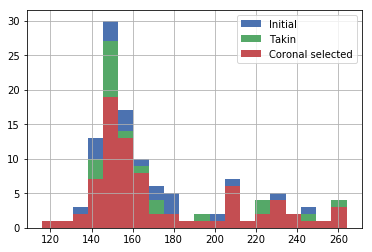

In [36]:
p1 = df["GA-Weeks"] * 7 + df["GA-Days"]
ax = p1.hist(bins=20)


df_pass = df.loc[(df["Dafi_Takin_brain"] == "1")]

p1_pass = df_pass["GA-Weeks"] * 7 + df_pass["GA-Days"]
p1_pass.hist(ax=ax, bins=20)


df_pass = df.loc[(df["Dafi_Takin_brain"] == "1") & df.CorSer]

p1_pass = df_pass["GA-Weeks"] * 7 + df_pass["GA-Days"]
p1_pass.hist(ax=ax, bins=20)

plt.legend(["Initial", "Takin", "Coronal selected"])

## Data from GE

In [59]:
ge_df = pd.read_excel("/media/df3/Fetal/רשימת נבדקים-Fetal.xls", header=3)

In [87]:
ge_df_age = ge_df.loc[ge_df["normal anatomy 0=normal"] == 0]['שבוע הריון']
ge_df_age_1 = pd.to_numeric(ge_df_age, errors="coerce")
ge_df_age_list = (ge_df_age_1 % 1.0) * 10  + (ge_df_age_1  - (ge_df_age_1 % 1.0))*7

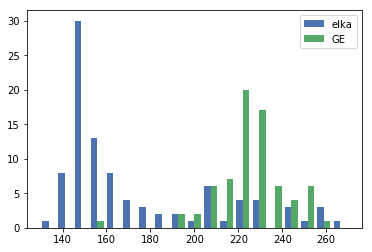

In [142]:
bins = np.linspace(130, 270, 20)

#Add elka data
all_data = pd.DataFrame()
all_data["GA-Days"] = p1_pass.dropna()
all_data.reset_index(drop=True)
all_data['source'] = 'elka'


#Add GE data
ge_df_new_list = pd.DataFrame() 
ge_df_new_list["GA-Days"] = ge_df_age_list.dropna()
ge_df_new_list.reset_index(drop=True)
ge_df_new_list['source'] = 'ge'

#all_data = pd.concat([all_data, ge_df_new_list])

plt.hist([all_data["GA-Days"], ge_df_new_list["GA-Days"]],bins, label=['elka', 'GE'])
plt.legend(loc='upper right')
plt.show()



In [132]:
bins

array([  0.        ,  10.25641026,  20.51282051,  30.76923077,
        41.02564103,  51.28205128,  61.53846154,  71.79487179,
        82.05128205,  92.30769231, 102.56410256, 112.82051282,
       123.07692308, 133.33333333, 143.58974359, 153.84615385,
       164.1025641 , 174.35897436, 184.61538462, 194.87179487,
       205.12820513, 215.38461538, 225.64102564, 235.8974359 ,
       246.15384615, 256.41025641, 266.66666667, 276.92307692,
       287.17948718, 297.43589744, 307.69230769, 317.94871795,
       328.20512821, 338.46153846, 348.71794872, 358.97435897,
       369.23076923, 379.48717949, 389.74358974, 400.        ])

## Fix Elka DATA

In [144]:
import os
import shutil
import glob

In [155]:
fc = 0
for fetaldir in glob.glob(os.path.join("/media/df3/Fetal/Fetal-Elka/","*","*","*")):
    if not os.path.isdir(fetaldir):
        continue
    for imgfile in glob.glob(os.path.join(fetaldir, "*", "*")):
        imgfile_fn = os.path.basename(imgfile)
        if "dcm" not in imgfile_fn and not os.path.isdir(imgfile_fn):
            print(imgfile_fn, " *-* ", imgfile)
            shutil.move(imgfile, imgfile+".dcm")
    fc = fc + 1

62745  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/1/6271(fetal_1)/6274_saggital/62745
62746  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/1/6271(fetal_1)/6274_saggital/62746
62747  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/1/6271(fetal_1)/6274_saggital/62747
62748  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/1/6271(fetal_1)/6274_saggital/62748
62749  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/1/6271(fetal_1)/6274_saggital/62749
62750  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/1/6271(fetal_1)/6274_saggital/62750
62751  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/1/6271(fetal_1)/6274_saggital/62751
62752  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/1/6271(fetal_1)/6274_saggital/62752
62753  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/1/6271(fetal_1)/6274_saggital/62753
62754  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/1/6271(fetal_1)/6274_saggital/62754
62755  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/1/6271(fetal_1)/6274_saggital/62755
62756  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/1/6271(fetal_1)/6274_saggital/62756
62757  *-*  /med

760262  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/76011/760262
760263  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/76011/760263
760264  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/76011/760264
760265  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/76011/760265
760266  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/76011/760266
760267  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/76011/760267
760268  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/76011/760268
760269  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/76011/760269
76012  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7602/76012
76013  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7602/76013
76014  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7602/76014
76015  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7602/76015
76016  *-*  /med

760152  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7607/760152
760153  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7607/760153
760154  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7607/760154
760155  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7607/760155
760156  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7607/760156
760157  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7607/760157
760158  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7607/760158
760159  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7607/760159
760160  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7607/760160
760161  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7607/760161
760162  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7607/760162
760163  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7601(fetal101)/7607/760163
760164  *-*  /me

761316  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761271/761316
761317  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761271/761317
761318  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761271/761318
761319  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761271/761319
761320  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761271/761320
761321  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761271/761321
761322  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761271/761322
761323  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761271/761323
761324  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761271/761324
761325  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761271/761325
761326  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761271/761326
761327  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110

761459  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761277/761459
761460  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761277/761460
761461  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761277/761461
761462  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761277/761462
761463  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761277/761463
761464  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761277/761464
761465  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761277/761465
761466  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761277/761466
761467  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761277/761467
761468  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761277/761468
761469  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/761270(fetal102)/761277/761469
761470  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110

762581  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/762496(fetal103)/762499/762581
762582  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/762496(fetal103)/762500/762582
762583  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/762496(fetal103)/762500/762583
762584  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/762496(fetal103)/762500/762584
762585  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/762496(fetal103)/762500/762585
762586  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/762496(fetal103)/762500/762586
762587  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/762496(fetal103)/762500/762587
762588  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/762496(fetal103)/762500/762588
762589  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/762496(fetal103)/762500/762589
762590  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/762496(fetal103)/762500/762590
762591  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/762496(fetal103)/762500/762591
762592  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110

764765  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/764759(fetal105)/764760/764765
764766  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/764759(fetal105)/764760/764766
764767  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/764759(fetal105)/764760/764767
764768  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/764759(fetal105)/764760/764768
764769  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/764759(fetal105)/764760/764769
764770  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/764759(fetal105)/764760/764770
764771  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/764759(fetal105)/764760/764771
764772  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/764759(fetal105)/764760/764772
764773  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/764759(fetal105)/764760/764773
764774  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/764759(fetal105)/764760/764774
764775  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/764759(fetal105)/764760/764775
764776  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110

766954  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/766929(fetal107)/766931/766954
766955  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/766929(fetal107)/766931/766955
766956  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/766929(fetal107)/766931/766956
766957  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/766929(fetal107)/766931/766957
766958  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/766929(fetal107)/766931/766958
766959  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/766929(fetal107)/766931/766959
766960  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/766929(fetal107)/766931/766960
766961  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/766929(fetal107)/766931/766961
766962  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/766929(fetal107)/766931/766962
766963  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/766929(fetal107)/766931/766963
766964  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/766929(fetal107)/766931/766964
766965  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110

7671074  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7671051(fetal108)/7671052/7671074
7671075  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7671051(fetal108)/7671052/7671075
7671076  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7671051(fetal108)/7671052/7671076
7671077  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7671051(fetal108)/7671052/7671077
7671078  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7671051(fetal108)/7671052/7671078
7671079  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7671051(fetal108)/7671052/7671079
7671080  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7671051(fetal108)/7671052/7671080
7671081  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7671051(fetal108)/7671052/7671081
7671082  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7671051(fetal108)/7671052/7671082
7671083  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7671051(fetal108)/7671052/7671083
7671084  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7671051(fetal108)/7671052/7671084
7671085  *

7681216  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7681179/7681181/7681216
7681217  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7681179/7681181/7681217
7681218  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7681179/7681181/7681218
7681219  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7681179/7681182/7681219
7681220  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7681179/7681182/7681220
7681221  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7681179/7681182/7681221
7681222  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7681179/7681182/7681222
7681223  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7681179/7681182/7681223
7681224  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7681179/7681182/7681224
7681225  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7681179/7681182/7681225
7681226  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7681179/7681182/7681226
7681227  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7681179/7681182/7681227
7681228  *-*  /media/df3/Fetal/Fetal-Elk

7691339  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691246/7691339
7691340  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691246/7691340
7691341  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691246/7691341
7691342  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691246/7691342
7691343  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691246/7691343
7691344  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691246/7691344
7691345  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691246/7691345
7691346  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691246/7691346
7691347  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691246/7691347
7691348  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691246/7691348
7691349  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691246/7691349
7691350  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691246/7691350
7691351  *-*  /media/df3/Fetal/Fetal-Elk

7691459  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691249/7691459
7691460  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691249/7691460
7691461  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691249/7691461
7691462  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691249/7691462
7691463  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691249/7691463
7691464  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691249/7691464
7691465  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691249/7691465
7691466  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691249/7691466
7691467  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691249/7691467
7691468  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691249/7691468
7691469  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691249/7691469
7691470  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/101-110/7691243/7691249/7691470
7691471  *-*  /media/df3/Fetal/Fetal-Elk

63784  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6371(fetal11)/6375_sag/63784
63785  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6371(fetal11)/6375_sag/63785
63786  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6371(fetal11)/6375_sag/63786
63787  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6371(fetal11)/6375_sag/63787
637100  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6371(fetal11)/6376_sag/637100
637101  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6371(fetal11)/6376_sag/637101
637102  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6371(fetal11)/6376_sag/637102
637103  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6371(fetal11)/6376_sag/637103
637104  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6371(fetal11)/6376_sag/637104
63788  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6371(fetal11)/6376_sag/63788
63789  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6371(fetal11)/6376_sag/63789
63790  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6371(fetal11)/6376_sag/63790
63791  *-*  /media

638227  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/638145(fetal12)/638149_axial/638227
638228  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/638145(fetal12)/638149_axial/638228
638229  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/638145(fetal12)/638149_axial/638229
638230  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/638145(fetal12)/638149_axial/638230
638231  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/638145(fetal12)/638149_axial/638231
638232  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/638145(fetal12)/638149_axial/638232
638233  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/638145(fetal12)/638149_axial/638233
638234  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/638145(fetal12)/638149_axial/638234
638235  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/638145(fetal12)/638149_axial/638235
638236  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/638145(fetal12)/638149_axial/638236
638237  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/638145(fetal12)/638149_axial/638237
638238  *-*  /media/d

639367  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/639278(feal13)/639284/639367
639368  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/639278(feal13)/639284/639368
639369  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/639278(feal13)/639284/639369
639370  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/639278(feal13)/639284/639370
639371  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/639278(feal13)/639284/639371
639372  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/639278(feal13)/639284/639372
639373  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/639278(feal13)/639284/639373
639374  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/639278(feal13)/639284/639374
639375  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/639278(feal13)/639284/639375
639376  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/639278(feal13)/639284/639376
639377  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/639278(feal13)/639284/639377
639378  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/639278(feal13)/639284/639378
639379  *-*  /me

640487  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/640443(fetal14)/640444_ax/640487
640488  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/640443(fetal14)/640444_ax/640488
640489  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/640443(fetal14)/640444_ax/640489
640490  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/640443(fetal14)/640444_ax/640490
640491  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/640443(fetal14)/640444_ax/640491
640492  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/640443(fetal14)/640444_ax/640492
640493  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/640443(fetal14)/640444_ax/640493
640494  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/640443(fetal14)/640444_ax/640494
641551  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/641528(fetal15)/641530_axial/641551
641552  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/641528(fetal15)/641530_axial/641552
641553  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/641528(fetal15)/641530_axial/641553
641554  *-*  /media/df3/Fetal/Fetal-Elka/Elka

642663  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/642600(fetal16)/642603_horizontal/642663
642664  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/642600(fetal16)/642603_horizontal/642664
642665  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/642600(fetal16)/642603_horizontal/642665
642666  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/642600(fetal16)/642603_horizontal/642666
642667  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/642600(fetal16)/642603_horizontal/642667
642668  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/642600(fetal16)/642603_horizontal/642668
642669  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/642600(fetal16)/642603_horizontal/642669
642670  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/642600(fetal16)/642603_horizontal/642670
642671  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/642600(fetal16)/642603_horizontal/642671
642672  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/642600(fetal16)/642604_saggital/642672
642673  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/642600(fe

642796  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/642600(fetal16)/642611/642796
642797  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/642600(fetal16)/642611/642797
642798  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/642600(fetal16)/642611/642798
643823  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/643799(fetal17)/643801_sagital/643823
643824  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/643799(fetal17)/643801_sagital/643824
643825  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/643799(fetal17)/643801_sagital/643825
643826  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/643799(fetal17)/643801_sagital/643826
643827  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/643799(fetal17)/643801_sagital/643827
643828  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/643799(fetal17)/643801_sagital/643828
643829  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/643799(fetal17)/643801_sagital/643829
643830  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/643799(fetal17)/643801_sagital/643830
643831  *-*  /media/df3

644996  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/644909(fetal18)/644913_horizontal/644996
6441000  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/644909(fetal18)/644914_saggital/6441000
6441001  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/644909(fetal18)/644914_saggital/6441001
6441002  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/644909(fetal18)/644914_saggital/6441002
6441003  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/644909(fetal18)/644914_saggital/6441003
6441004  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/644909(fetal18)/644914_saggital/6441004
6441005  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/644909(fetal18)/644914_saggital/6441005
6441006  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/644909(fetal18)/644914_saggital/6441006
6441007  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/644909(fetal18)/644914_saggital/6441007
6441008  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/644909(fetal18)/644914_saggital/6441008
6441009  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/644909

6451152  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6451014(fetal20)/6451022/6451152
6451153  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6451014(fetal20)/6451022/6451153
6451154  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6451014(fetal20)/6451022/6451154
6451155  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6451014(fetal20)/6451022/6451155
6451156  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6451014(fetal20)/6451022/6451156
6451157  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6451014(fetal20)/6451022/6451157
6451158  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6451014(fetal20)/6451022/6451158
6451159  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6451014(fetal20)/6451022/6451159
6451160  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6451014(fetal20)/6451022/6451160
6451161  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6451014(fetal20)/6451022/6451161
6451162  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/11-20/6451014(fetal20)/6451022/6451162
67610  *-*  /media/df3/Fetal/Fetal-Elka/Elk

676116  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6761(fetal111)/6765/676116
676117  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6761(fetal111)/6765/676117
676118  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6761(fetal111)/6765/676118
676119  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6761(fetal111)/6765/676119
67697  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6761(fetal111)/6765/67697
67698  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6761(fetal111)/6765/67698
67699  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6761(fetal111)/6765/67699
677155  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677146_cor/677155
677156  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677146_cor/677156
677157  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677146_cor/677157
677158  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677146_cor/677158
677159  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/

677248  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677149_ax/677248
677249  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677149_ax/677249
677250  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677149_ax/677250
677251  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677149_ax/677251
677252  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677149_ax/677252
677253  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677149_ax/677253
677254  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677149_ax/677254
677255  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677149_ax/677255
677256  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677149_ax/677256
677257  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677149_ax/677257
677258  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677149_ax/677258
677259  *-*  /media/d

677392  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677154_sag/677392
677393  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677154_sag/677393
677394  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677154_sag/677394
677395  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677154_sag/677395
677396  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/677145(fetal112)/677154_sag/677396
678400  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/678397/678398/678400
678401  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/678397/678398/678401
678402  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/678397/678398/678402
678403  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/678397/678398/678403
678404  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/678397/678398/678404
678405  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/678397/678398/678405
678406  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/678397/678398/678406
678407  *-*  /medi

679508  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/679451/679452/679508
679509  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/679451/679453/679509
679510  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/679451/679453/679510
679511  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/679451/679453/679511
679512  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/679451/679453/679512
679513  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/679451/679453/679513
679514  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/679451/679453/679514
679515  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/679451/679453/679515
679516  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/679451/679453/679516
679517  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/679451/679453/679517
679518  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/679451/679453/679518
679519  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/679451/679453/679519
679520  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/679451/679453/679520
679521  *-* 

681652  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681633/681652
681653  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681633/681653
681654  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681633/681654
681655  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681633/681655
681656  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681633/681656
681657  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681633/681657
681658  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681633/681658
681659  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681634/681659
681660  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681634/681660
681661  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681634/681661
681662  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681634/681662
681663  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119

681801  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681639/681801
681802  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681639/681802
681803  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681639/681803
681804  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681639/681804
681805  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681639/681805
681806  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681639/681806
681807  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681639/681807
681808  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681639/681808
681809  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681639/681809
681810  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681639/681810
681811  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/681632(fetal116)/681639/681811
681812  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119

683953  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/683931(fetal118)/683932_coronal/683953
683954  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/683931(fetal118)/683932_coronal/683954
683955  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/683931(fetal118)/683933_coronal/683955
683956  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/683931(fetal118)/683933_coronal/683956
683957  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/683931(fetal118)/683933_coronal/683957
683958  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/683931(fetal118)/683933_coronal/683958
683959  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/683931(fetal118)/683933_coronal/683959
683960  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/683931(fetal118)/683933_coronal/683960
683961  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/683931(fetal118)/683933_coronal/683961
683962  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/683931(fetal118)/683933_coronal/683962
683963  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/68393

6841078  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6841001(fetal119)/6841006_coronal/6841078
6841079  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6841001(fetal119)/6841006_coronal/6841079
6841080  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6841001(fetal119)/6841006_coronal/6841080
6841081  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6841001(fetal119)/6841006_coronal/6841081
6841082  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6841001(fetal119)/6841006_coronal/6841082
6841083  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6841001(fetal119)/6841007/6841083
6841084  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6841001(fetal119)/6841007/6841084
6841085  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6841001(fetal119)/6841007/6841085
6841086  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6841001(fetal119)/6841007/6841086
6841087  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6841001(fetal119)/6841007/6841087
6841088  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/111-119/6841

629151  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/62976(fetal_3)/62982_horizontal/629151
629152  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/62976(fetal_3)/62982_horizontal/629152
629153  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/62976(fetal_3)/62982_horizontal/629153
629154  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/62976(fetal_3)/62982_horizontal/629154
629155  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/62976(fetal_3)/62982_horizontal/629155
629156  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/62976(fetal_3)/62982_horizontal/629156
629157  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/62976(fetal_3)/62983_horizontal/629157
629158  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/62976(fetal_3)/62983_horizontal/629158
629159  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/62976(fetal_3)/62983_horizontal/629159
629160  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/62976(fetal_3)/62983_horizontal/629160
629161  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/62976(fetal_3)/62983_horizontal/629161

630284  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630193_coronal/630284
630285  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630193_coronal/630285
630286  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630193_coronal/630286
630287  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630193_coronal/630287
630288  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630193_coronal/630288
630289  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630193_coronal/630289
630290  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630193_coronal/630290
630291  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630193_coronal/630291
630292  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630193_coronal/630292
630293  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630193_coronal/630293
630294  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630193_coronal/630294
630295  *-

630403  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630200_coronal/630403
630404  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630200_coronal/630404
630405  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630200_coronal/630405
630406  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630200_coronal/630406
630407  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630200_coronal/630407
630421  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630202_saggital/630421
630422  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630202_saggital/630422
630423  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630202_saggital/630423
630424  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630202_saggital/630424
630425  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630202_saggital/630425
630426  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630202_saggital/630426
6304

630528  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630207/630528
630529  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630207/630529
630530  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630207/630530
630531  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630207/630531
630532  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630207/630532
630533  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630207/630533
630534  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630207/630534
630535  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630207/630535
630536  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630207/630536
630537  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630207/630537
630538  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630207/630538
630539  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/630188(fetal_4)/630207/630539
630540  *-*  /me

631697  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/631601(fetal_5)/631606/631697
631698  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/631601(fetal_5)/631606/631698
631699  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/631601(fetal_5)/631606/631699
631700  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/631601(fetal_5)/631606/631700
631701  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/631601(fetal_5)/631606/631701
631702  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/631601(fetal_5)/631606/631702
631703  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/631601(fetal_5)/631606/631703
631704  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/631601(fetal_5)/631606/631704
631705  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/631601(fetal_5)/631606/631705
631706  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/631601(fetal_5)/631606/631706
631707  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/631601(fetal_5)/631606/631707
631708  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/631601(fetal_5)/631607/631708
631709  *-*  /me

632821  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632808_saggital/632821
632822  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632808_saggital/632822
632823  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632808_saggital/632823
632824  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632808_saggital/632824
632825  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632808_saggital/632825
632826  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632808_saggital/632826
632827  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632808_saggital/632827
632828  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632808_saggital/632828
632829  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632808_saggital/632829
632831  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632808_saggital/632831
632832  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632808_saggital/632832

632962  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632815/632962
632963  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632815/632963
632964  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632815/632964
632965  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632815/632965
632966  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632815/632966
632967  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632815/632967
632968  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632815/632968
632969  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632815/632969
632970  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632815/632970
632971  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632815/632971
632972  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632815/632972
632973  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632815/632973
632974  *-*  /me

6321074  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632820/6321074
6321075  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632820/6321075
6321076  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632820/6321076
6321077  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632820/6321077
6321078  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632820/6321078
6321079  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632820/6321079
6321080  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632820/6321080
6321081  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/632807(fetal_6)/632820/6321081
6331096  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6331082(fetal_7)/6331083(ax)/6331096
6331097  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6331082(fetal_7)/6331083(ax)/6331097
6331098  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6331082(fetal_7)/6331083(ax)/6331098
6331099  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/63310

6331243  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6331082(fetal_7)/6331092_sag/6331243
6331244  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6331082(fetal_7)/6331092_sag/6331244
6331245  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6331082(fetal_7)/6331092_sag/6331245
6331246  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6331082(fetal_7)/6331092_sag/6331246
6331247  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6331082(fetal_7)/6331092_sag/6331247
6331248  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6331082(fetal_7)/6331092_sag/6331248
6331249  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6331082(fetal_7)/6331092_sag/6331249
6331250  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6331082(fetal_7)/6331092_sag/6331250
6331251  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6331082(fetal_7)/6331092_sag/6331251
6331252  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6331082(fetal_7)/6331093/6331252
6331253  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6331082(fetal_7)/6331093/6331253
6331254  *-*  /med

6351382  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351357_horizontal/6351382
6351383  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351357_horizontal/6351383
6351384  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351357_horizontal/6351384
6351385  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351357_horizontal/6351385
6351386  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351357_horizontal/6351386
6351387  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351357_horizontal/6351387
6351388  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351357_horizontal/6351388
6351389  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351357_horizontal/6351389
6351390  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351357_horizontal/6351390
6351391  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351357_horizontal/6351391
6351392  *-*  /media/df3/Fetal

6351519  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351363_horizontal/6351519
6351520  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351363_horizontal/6351520
6351521  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351363_horizontal/6351521
6351522  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351363_horizontal/6351522
6351523  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351363_horizontal/6351523
6351524  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351363_horizontal/6351524
6351525  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351363_horizontal/6351525
6351526  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351363_horizontal/6351526
6351527  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351363_horizontal/6351527
6351528  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351363_horizontal/6351528
6351529  *-*  /media/df3/Fetal

6351623  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351368_cor6/6351623
6351624  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351369_saggital/6351624
6351625  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351369_saggital/6351625
6351626  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351369_saggital/6351626
6351627  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351369_saggital/6351627
6351628  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351369_saggital/6351628
6351629  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351369_saggital/6351629
6351630  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351369_saggital/6351630
6351631  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351369_saggital/6351631
6351632  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6351356(fetal_9)/6351369_saggital/6351632
6351633  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/2-10/6

647108  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/21-30/647103/647108
647109  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/21-30/647103/647109
647110  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/21-30/647103/647110
647111  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/21-30/647103/647111
647112  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/21-30/647103/647112
648281  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/21-30/648280/648281
648282  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/21-30/648280/648282
648283  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/21-30/648280/648283
648284  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/21-30/648280/648284
648285  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/21-30/648280/648285
648286  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/21-30/648280/648286
648287  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/21-30/648280/648287
648288  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/21-30/648280/648288
648289  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-3

64643  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6461(fetal21)/6463/64643
64644  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6461(fetal21)/6463/64644
64645  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6461(fetal21)/6463/64645
64646  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6461(fetal21)/6463/64646
64647  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6461(fetal21)/6463/64647
64648  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6461(fetal21)/6463/64648
64649  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6461(fetal21)/6463/64649
64650  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6461(fetal21)/6463/64650
64651  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6461(fetal21)/6463/64651
64652  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6461(fetal21)/6463/64652
64653  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6461(fetal21)/6464/64653
64654  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6461(fetal21)/6464/64654
64655  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6461(fetal21)/6464/64655

647166  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/647103(fetal22)/647106/647166
647167  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/647103(fetal22)/647106/647167
647168  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/647103(fetal22)/647106/647168
647169  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/647103(fetal22)/647106/647169
647170  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/647103(fetal22)/647106/647170
647171  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/647103(fetal22)/647106/647171
647172  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/647103(fetal22)/647106/647172
647173  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/647103(fetal22)/647106/647173
647174  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/647103(fetal22)/647107/647174
647175  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/647103(fetal22)/647107/647175
647176  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/647103(fetal22)/647107/647176
647177  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/647103(fetal22)/647107/647177
6471

648294  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648281/648294
648295  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648281/648295
648296  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648281/648296
648297  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648281/648297
648298  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648281/648298
648299  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648281/648299
648300  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648281/648300
648301  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648281/648301
648302  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648281/648302
648303  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648281/648303
648304  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648281/648304
648305  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648281/648305
6483

648415  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648287/648415
648416  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648287/648416
648417  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648287/648417
648418  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648287/648418
648419  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648287/648419
648420  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648287/648420
648421  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648287/648421
648422  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648287/648422
648423  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648287/648423
648424  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648287/648424
648425  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648287/648425
648426  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648287/648426
6484

648519  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648292/648519
648520  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648292/648520
648521  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648292/648521
648522  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648292/648522
648523  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648292/648523
648524  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648292/648524
648525  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648292/648525
648526  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648292/648526
648527  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648292/648527
648528  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648292/648528
648529  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648292/648529
648530  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/648280(fetal23)/648292/648530
6485

650638  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650598/650638
650639  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650598/650639
650640  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650598/650640
650641  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650598/650641
650642  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650598/650642
650643  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650598/650643
650644  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650599/650644
650645  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650599/650645
650646  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650599/650646
650647  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650599/650647
650648  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650599/650648
650649  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650599/650649
6506

650757  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650606/650757
650758  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650606/650758
650759  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650606/650759
650760  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650606/650760
650761  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650606/650761
650762  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650606/650762
650763  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650606/650763
650764  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650606/650764
650765  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650606/650765
650766  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650606/650766
650767  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650606/650767
650768  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/650596(fetal25)/650606/650768
6507

652881  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/652865(fetal27)/652866/652881
652882  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/652865(fetal27)/652866/652882
652883  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/652865(fetal27)/652866/652883
652884  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/652865(fetal27)/652866/652884
652885  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/652865(fetal27)/652866/652885
652886  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/652865(fetal27)/652866/652886
652887  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/652865(fetal27)/652866/652887
652888  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/652865(fetal27)/652866/652888
652889  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/652865(fetal27)/652867/652889
652890  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/652865(fetal27)/652867/652890
652891  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/652865(fetal27)/652867/652891
652892  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/652865(fetal27)/652867/652892
6528

653996  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/653960(fetal28)/653962_saggital/653996
653997  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/653960(fetal28)/653962_saggital/653997
653998  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/653960(fetal28)/653962_saggital/653998
653999  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/653960(fetal28)/653962_saggital/653999
6531038  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/653960(fetal28)/653964_cor/6531038
6531039  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/653960(fetal28)/653964_cor/6531039
6531040  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/653960(fetal28)/653964_cor/6531040
6531041  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/653960(fetal28)/653964_cor/6531041
6531042  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/653960(fetal28)/653964_cor/6531042
6531043  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/653960(fetal28)/653964_cor/6531043
6531044  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/653960(fetal28)/653964_cor/6531044
6531045  

6541176  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6541134(fetal29)/6541136_saggital/6541176
6541177  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6541134(fetal29)/6541136_saggital/6541177
6541178  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6541134(fetal29)/6541136_saggital/6541178
6541179  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6541134(fetal29)/6541136_saggital/6541179
6541180  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6541134(fetal29)/6541136_saggital/6541180
6541181  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6541134(fetal29)/6541136_saggital/6541181
6541182  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6541134(fetal29)/6541136_saggital/6541182
6541183  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6541134(fetal29)/6541136_saggital/6541183
6541184  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6541134(fetal29)/6541136_saggital/6541184
6541185  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6541134(fetal29)/6541136_saggital/6541185
6541186  *-*  /media/df3/Fetal/Fetal-Elk

6551352  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6551271(fetal30)/6551275/6551352
6551353  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6551271(fetal30)/6551275/6551353
6551354  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6551271(fetal30)/6551275/6551354
6551355  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6551271(fetal30)/6551275/6551355
6551356  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6551271(fetal30)/6551275/6551356
6551357  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6551271(fetal30)/6551275/6551357
6551358  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6551271(fetal30)/6551275/6551358
6551359  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6551271(fetal30)/6551275/6551359
6551360  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6551271(fetal30)/6551275/6551360
6551361  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6551271(fetal30)/6551275/6551361
6551362  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/21-30/6551271(fetal30)/6551275/6551362
6551363  *-*  /media/df3/Fetal/Fetal-Elka/E

65676  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6561(fetal31)/6563/65676
65677  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6561(fetal31)/6563/65677
65678  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6561(fetal31)/6563/65678
65679  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6561(fetal31)/6563/65679
65680  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6561(fetal31)/6563/65680
656100  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6561(fetal31)/6564/656100
656101  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6561(fetal31)/6564/656101
656102  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6561(fetal31)/6564/656102
656103  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6561(fetal31)/6564/656103
656104  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6561(fetal31)/6564/656104
656105  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6561(fetal31)/6564/656105
656106  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6561(fetal31)/6564/656106
656107  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6561(feta

657244  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/657153(fetal32)/657158_coronal/657244
657245  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/657153(fetal32)/657158_coronal/657245
657246  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/657153(fetal32)/657158_coronal/657246
657247  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/657153(fetal32)/657158_coronal/657247
657248  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/657153(fetal32)/657158_coronal/657248
657249  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/657153(fetal32)/657158_coronal/657249
657250  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/657153(fetal32)/657158_coronal/657250
657251  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/657153(fetal32)/657158_coronal/657251
657252  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/657153(fetal32)/657158_coronal/657252
657253  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/657153(fetal32)/657158_coronal/657253
657254  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/657153(fetal32)/657158_coronal/657254

658393  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/658320(fetal33)/658323_horizontal/658393
658394  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/658320(fetal33)/658323_horizontal/658394
658395  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/658320(fetal33)/658323_horizontal/658395
658396  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/658320(fetal33)/658323_horizontal/658396
658397  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/658320(fetal33)/658323_horizontal/658397
658398  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/658320(fetal33)/658323_horizontal/658398
658399  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/658320(fetal33)/658323_horizontal/658399
658400  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/658320(fetal33)/658323_horizontal/658400
658401  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/658320(fetal33)/658323_horizontal/658401
658402  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/658320(fetal33)/658323_horizontal/658402
658403  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/658320(

660566  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660508_saggital/660566
660567  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660508_saggital/660567
660568  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660508_saggital/660568
660569  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660509_ax/660569
660570  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660509_ax/660570
660571  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660509_ax/660571
660572  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660509_ax/660572
660573  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660509_ax/660573
660574  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660509_ax/660574
660575  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660509_ax/660575
660576  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660509_ax/660576
660577  *-*  /media/df3/Fetal/Fetal-

660682  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660512/660682
660683  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660512/660683
660684  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660512/660684
660685  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660512/660685
660686  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660512/660686
660687  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660512/660687
660688  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660512/660688
660689  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660512/660689
660690  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660512/660690
660691  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660512/660691
660692  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660512/660692
660693  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/660506(fetal35)/660512/660693
6606

661789  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661767/661789
661790  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661767/661790
661791  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661767/661791
661792  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661767/661792
661793  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661767/661793
661794  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661767/661794
661795  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661767/661795
661796  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661767/661796
661797  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661767/661797
661798  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661767/661798
661799  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661767/661799
661800  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661767/661800
6618

661943  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661771_axial/661943
661944  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661771_axial/661944
661945  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661771_axial/661945
661946  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661771_axial/661946
661947  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661771_axial/661947
661948  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661771_axial/661948
661949  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661771_axial/661949
661950  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661771_axial/661950
661951  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661771_axial/661951
661952  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661772/661952
661953  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/661766(fetal36)/661772/661953
661954  *-*  /media/df3/Fetal/Fet

6621100  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6621046/6621048_axial/6621100
6621101  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6621046/6621048_axial/6621101
6621102  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6621046/6621048_axial/6621102
6621103  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6621046/6621048_axial/6621103
6621104  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6621046/6621048_axial/6621104
6621105  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6621046/6621048_axial/6621105
6621106  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6621046/6621048_axial/6621106
6621107  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6621046/6621048_axial/6621107
6621108  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6621046/6621048_axial/6621108
6621109  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6621046/6621048_axial/6621109
6621110  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6621046/6621048_axial/6621110
6621111  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6621046/6621048_axial/

6621220  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6621046/6621051_saggital/6621220
6621221  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6621046/6621051_saggital/6621221
6631228  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6631222(fetal38)/6631223_saggital/6631228
6631229  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6631222(fetal38)/6631223_saggital/6631229
6631230  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6631222(fetal38)/6631223_saggital/6631230
6631231  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6631222(fetal38)/6631223_saggital/6631231
6631232  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6631222(fetal38)/6631223_saggital/6631232
6631233  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6631222(fetal38)/6631223_saggital/6631233
6631234  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6631222(fetal38)/6631223_saggital/6631234
6631235  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6631222(fetal38)/6631223_saggital/6631235
6631236  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6631

6641361  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6641328(fetal39)/6641329_saggital/6641361
6641362  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6641328(fetal39)/6641329_saggital/6641362
6641363  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6641328(fetal39)/6641329_saggital/6641363
6641364  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6641328(fetal39)/6641329_saggital/6641364
6641399  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6641328(fetal39)/6641331_saggital/6641399
6641400  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6641328(fetal39)/6641331_saggital/6641400
6641401  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6641328(fetal39)/6641331_saggital/6641401
6641402  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6641328(fetal39)/6641331_saggital/6641402
6641403  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6641328(fetal39)/6641331_saggital/6641403
6641404  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6641328(fetal39)/6641331_saggital/6641404
6641405  *-*  /media/df3/Fetal/Fetal-Elk

6651505  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6651437(40-twins)/6651439_sag/6651505
6651506  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6651437(40-twins)/6651439_sag/6651506
6651507  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6651437(40-twins)/6651439_sag/6651507
6651508  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6651437(40-twins)/6651439_sag/6651508
6651509  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6651437(40-twins)/6651439_sag/6651509
6651510  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6651437(40-twins)/6651439_sag/6651510
6651511  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6651437(40-twins)/6651439_sag/6651511
6651512  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6651437(40-twins)/6651440_sag/6651512
6651513  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6651437(40-twins)/6651440_sag/6651513
6651514  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6651437(40-twins)/6651440_sag/6651514
6651515  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/31-40/6651437(40-twins)/6651440_

66624  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6661(fetal41)/6662_axial/66624
66625  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6661(fetal41)/6662_axial/66625
66626  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6661(fetal41)/6662_axial/66626
66627  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6661(fetal41)/6662_axial/66627
66628  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6661(fetal41)/6662_axial/66628
66629  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6661(fetal41)/6662_axial/66629
66630  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6661(fetal41)/6663_saggital/66630
66631  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6661(fetal41)/6663_saggital/66631
66632  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6661(fetal41)/6663_saggital/66632
66633  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6661(fetal41)/6663_saggital/66633
66634  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6661(fetal41)/6663_saggital/66634
66635  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6661(fetal41)/6663_s

668213  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/668207(fetal43)/668208/668213
668214  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/668207(fetal43)/668208/668214
668215  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/668207(fetal43)/668208/668215
668216  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/668207(fetal43)/668208/668216
668217  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/668207(fetal43)/668208/668217
668218  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/668207(fetal43)/668208/668218
668219  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/668207(fetal43)/668208/668219
668220  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/668207(fetal43)/668208/668220
668221  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/668207(fetal43)/668208/668221
668222  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/668207(fetal43)/668208/668222
668223  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/668207(fetal43)/668208/668223
668224  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/668207(fetal43)/668208/668224
6682

669348  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669317/669348
669349  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669317/669349
669350  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669317/669350
669351  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669317/669351
669352  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669317/669352
669353  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669317/669353
669354  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669317/669354
669355  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669317/669355
669356  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669317/669356
669357  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669317/669357
669358  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669317/669358
669359  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669317/669359
669360  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669317/669360
669361  *-*  /media/df3/Fetal/Fetal-El

669497  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669497
669500  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669500
669502  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669502
669506  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669506
669508  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669508
669510  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669510
669511  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669511
669512  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669512
669515  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669515
669518  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669518
669519  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669519
669521  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669521
669523  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669523
669524  *-*  /media/df3/Fetal/Fetal-El

669781  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669781
669782  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669782
669784  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669784
669789  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669789
669790  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669790
669792  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669792
669793  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669793
669794  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669794
669801  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669801
669803  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669803
669812  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669812
669814  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669814
669817  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669817
669818  *-*  /media/df3/Fetal/Fetal-El

669553  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669553
669677  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669677
669593  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669593
669664  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669664
669644  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669644
669669  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669669
669548  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669548
669662  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669662
669440  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669440
669592  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669592
669465  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669465
669470  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669470
669528  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669319/669528
669503  *-*  /media/df3/Fetal/Fetal-El

669848  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669320/669848
669849  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669320/669849
669850  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669320/669850
669851  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669320/669851
669852  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669320/669852
669853  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669320/669853
669854  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669320/669854
669855  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669320/669855
669856  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669320/669856
669857  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669320/669857
669858  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669321/669858
669859  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669321/669859
669860  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/669316/669321/669860
669861  *-*  /media/df3/Fetal/Fetal-El

670981  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/670883(fetal45)/670887_saggital/670981
670982  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/670883(fetal45)/670887_saggital/670982
670983  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/670883(fetal45)/670887_saggital/670983
670984  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/670883(fetal45)/670887_saggital/670984
670985  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/670883(fetal45)/670887_saggital/670985
670986  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/670883(fetal45)/670887_saggital/670986
670987  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/670883(fetal45)/670887_saggital/670987
670988  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/670883(fetal45)/670887_saggital/670988
670989  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/670883(fetal45)/670887_saggital/670989
670990  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/670883(fetal45)/670887_saggital/670990
670991  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/670883(fetal45)/670887_sagg

6711085  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/671992(fetal46)/671997/6711085
6711086  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/671992(fetal46)/671997/6711086
6711087  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/671992(fetal46)/671997/6711087
6711088  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/671992(fetal46)/671997/6711088
6711089  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/671992(fetal46)/671997/6711089
6711090  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/671992(fetal46)/671997/6711090
6711091  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/671992(fetal46)/671997/6711091
6711092  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/671992(fetal46)/671997/6711092
6711093  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/671992(fetal46)/671997/6711093
6711094  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/671992(fetal46)/671997/6711094
6711095  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/671992(fetal46)/671997/6711095
6711096  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/671992(feta

6731248  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6731211(fetal48)/6731212_axial/6731248
6731249  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6731211(fetal48)/6731212_axial/6731249
6731250  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6731211(fetal48)/6731212_axial/6731250
6731251  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6731211(fetal48)/6731212_axial/6731251
6731252  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6731211(fetal48)/6731212_axial/6731252
6731253  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6731211(fetal48)/6731212_axial/6731253
6731254  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6731211(fetal48)/6731212_axial/6731254
6731255  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6731211(fetal48)/6731212_axial/6731255
6731256  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6731211(fetal48)/6731212_axial/6731256
6731257  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6731211(fetal48)/6731212_axial/6731257
6731258  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6731211(fetal48)

6741388  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6741326(fetal49)/6741329_sag/6741388
6741389  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6741326(fetal49)/6741329_sag/6741389
6741390  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6741326(fetal49)/6741329_sag/6741390
6741391  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6741326(fetal49)/6741329_sag/6741391
6741392  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6741326(fetal49)/6741329_sag/6741392
6741393  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6741326(fetal49)/6741329_sag/6741393
6741394  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6741326(fetal49)/6741329_sag/6741394
6741395  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6741326(fetal49)/6741329_sag/6741395
6741396  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6741326(fetal49)/6741329_sag/6741396
6741397  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6741326(fetal49)/6741329_sag/6741397
6741414  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6741326(fetal49)/6741331_saggital/67

6751536  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6751443(fetal50)/6751448_ax_haste/6751536
6751537  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6751443(fetal50)/6751448_ax_haste/6751537
6751538  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6751443(fetal50)/6751448_ax_haste/6751538
6751539  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6751443(fetal50)/6751448_ax_haste/6751539
6751540  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6751443(fetal50)/6751449_sag_haste/6751540
6751541  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6751443(fetal50)/6751449_sag_haste/6751541
6751542  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6751443(fetal50)/6751449_sag_haste/6751542
6751543  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6751443(fetal50)/6751449_sag_haste/6751543
6751544  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6751443(fetal50)/6751449_sag_haste/6751544
6751545  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/41-50/6751443(fetal50)/6751449_sag_haste/6751545
6751546  *-*  /media/df3/Fetal/Fet

71116  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7111(fetal51)/7112_sag/71116
71117  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7111(fetal51)/7112_sag/71117
71118  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7111(fetal51)/7112_sag/71118
71119  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7111(fetal51)/7112_sag/71119
71120  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7111(fetal51)/7112_sag/71120
71121  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7111(fetal51)/7112_sag/71121
71122  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7111(fetal51)/7112_sag/71122
71123  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7111(fetal51)/7112_sag/71123
71124  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7111(fetal51)/7112_sag/71124
71125  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7111(fetal51)/7112_sag/71125
71126  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7111(fetal51)/7112_sag/71126
71127  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7111(fetal51)/7112_sag/71127
71128  *-*  /media/df3/Fetal

712181  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/712168(fetal52)/712169/712181
712182  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/712168(fetal52)/712169/712182
712183  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/712168(fetal52)/712169/712183
712184  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/712168(fetal52)/712169/712184
712185  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/712168(fetal52)/712169/712185
712186  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/712168(fetal52)/712169/712186
712187  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/712168(fetal52)/712169/712187
712188  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/712168(fetal52)/712169/712188
712189  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/712168(fetal52)/712169/712189
712190  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/712168(fetal52)/712169/712190
712191  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/712168(fetal52)/712169/712191
712192  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/712168(fetal52)/712169/712192
7121

713306  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/713275(fetal53)/713277_axial/713306
713307  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/713275(fetal53)/713277_axial/713307
713308  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/713275(fetal53)/713277_axial/713308
714331  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/714323(fetal54)/714324_sag/714331
714332  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/714323(fetal54)/714324_sag/714332
714333  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/714323(fetal54)/714324_sag/714333
714334  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/714323(fetal54)/714324_sag/714334
714335  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/714323(fetal54)/714324_sag/714335
714336  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/714323(fetal54)/714324_sag/714336
714337  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/714323(fetal54)/714324_sag/714337
714338  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/714323(fetal54)/714324_sag/714338
714339  *-*  /media/df3/Fetal/Fetal-E

715461  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/715446(fetal55)/715447_ax/715461
715462  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/715446(fetal55)/715447_ax/715462
715463  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/715446(fetal55)/715447_ax/715463
715464  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/715446(fetal55)/715447_ax/715464
715465  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/715446(fetal55)/715447_ax/715465
715466  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/715446(fetal55)/715447_ax/715466
715467  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/715446(fetal55)/715447_ax/715467
715468  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/715446(fetal55)/715448_sag/715468
715469  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/715446(fetal55)/715448_sag/715469
715470  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/715446(fetal55)/715448_sag/715470
715471  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/715446(fetal55)/715448_sag/715471
715472  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-

716621  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/716567(fetal56)/716570_ax/716621
716622  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/716567(fetal56)/716570_ax/716622
716623  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/716567(fetal56)/716570_ax/716623
716624  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/716567(fetal56)/716570_ax/716624
716625  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/716567(fetal56)/716570_ax/716625
716626  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/716567(fetal56)/716570_ax/716626
716627  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/716567(fetal56)/716570_ax/716627
716628  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/716567(fetal56)/716570_ax/716628
716629  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/716567(fetal56)/716570_ax/716629
716630  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/716567(fetal56)/716571_sag/716630
716631  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/716567(fetal56)/716571_sag/716631
716632  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60

717742  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/717665(fetal57)/717669_ax_not_FIESTA/717742
717743  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/717665(fetal57)/717669_ax_not_FIESTA/717743
717744  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/717665(fetal57)/717669_ax_not_FIESTA/717744
717745  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/717665(fetal57)/717669_ax_not_FIESTA/717745
717746  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/717665(fetal57)/717669_ax_not_FIESTA/717746
717747  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/717665(fetal57)/717669_ax_not_FIESTA/717747
717748  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/717665(fetal57)/717669_ax_not_FIESTA/717748
717749  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/717665(fetal57)/717670_axial/717749
717750  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/717665(fetal57)/717670_axial/717750
717751  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/717665(fetal57)/717670_axial/717751
717752  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7

718932  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718847/718932
718934  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718847/718934
718935  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718847/718935
718936  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718847/718936
718937  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718847/718937
718933  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718848/718933
718938  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718848/718938
718939  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718848/718939
718940  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718848/718940
718941  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718848/718941
718942  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718848/718942
718943  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718848/718943
718944  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718848/718944
718945  *-*  /media/df3/Fetal/Fetal-El

7181051  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718853/7181051
7181053  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718853/7181053
7181055  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718853/7181055
7181056  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718853/7181056
7181057  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718853/7181057
7181058  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718853/7181058
7181060  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718853/7181060
7181062  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718853/7181062
7181064  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718853/7181064
7181066  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718853/7181066
7181067  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718853/7181067
7181069  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718853/7181069
7181071  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718853/7181071
7181073  *-*

7181190  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718860/7181190
7181191  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718860/7181191
7181192  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/718844/718860/7181192
7191204  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191194/7191204
7191205  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191194/7191205
7191206  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191194/7191206
7191207  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191194/7191207
7191208  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191194/7191208
7191209  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191194/7191209
7191210  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191194/7191210
7191211  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191194/7191211
7191212  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/71911

7191326  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191200_sag_T2/7191326
7191327  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191200_sag_T2/7191327
7191328  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191200_sag_T2/7191328
7191329  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191200_sag_T2/7191329
7191330  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191200_sag_T2/7191330
7191331  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191200_sag_T2/7191331
7191332  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191200_sag_T2/7191332
7191333  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191200_sag_T2/7191333
7191334  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191200_sag_T2/7191334
7191335  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7191193(fetal59)/7191200_sag_T2/7191335
7191336  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/719119

7201454  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201415_ax/7201454
7201455  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201415_ax/7201455
7201456  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201415_ax/7201456
7201457  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201415_ax/7201457
7201458  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201415_ax/7201458
7201459  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201415_ax/7201459
7201460  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201415_ax/7201460
7201461  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201415_ax/7201461
7201462  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201415_ax/7201462
7201463  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201415_ax/7201463
7201464  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201415_ax/7201464
7201465  *

7201573  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201420_sag/7201573
7201574  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201420_sag/7201574
7201575  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201420_sag/7201575
7201576  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201420_sag/7201576
7201577  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201420_sag/7201577
7201578  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201420_sag/7201578
7201579  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201420_sag/7201579
7201580  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201420_sag/7201580
7201581  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201420_sag/7201581
7201582  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201420_sag/7201582
7201583  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201420_sag/7201583

7201700  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201426/7201700
7201701  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201426/7201701
7201702  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201426/7201702
7201703  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201426/7201703
7201704  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201426/7201704
7201705  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201426/7201705
7201706  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201426/7201706
7201707  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201426/7201707
7201708  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201426/7201708
7201709  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201426/7201709
7201710  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201426/7201710
7201711  *-*  /media/df3/Fetal/Fetal-Elka/E

7201797  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201431/7201797
7201798  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201431/7201798
7201799  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201431/7201799
7201800  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201431/7201800
7201801  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201431/7201801
7201802  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201431/7201802
7201803  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201431/7201803
7201804  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201431/7201804
7201805  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201431/7201805
7201806  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201431/7201806
7201807  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201431/7201807
7201808  *-*  /media/df3/Fetal/Fetal-Elka/E

7201893  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201435/7201893
7201894  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201435/7201894
7201895  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201435/7201895
7201896  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201435/7201896
7201897  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201435/7201897
7201898  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201435/7201898
7201899  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201435/7201899
7201900  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201436/7201900
7201901  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201436/7201901
7201902  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201436/7201902
7201903  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201436/7201903
7201904  *-*  /media/df3/Fetal/Fetal-Elka/E

7201989  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201438/7201989
7201990  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201438/7201990
7201991  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201438/7201991
7201992  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201438/7201992
7201993  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201438/7201993
7201994  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201438/7201994
7201995  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201438/7201995
7201996  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201438/7201996
7201997  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201438/7201997
7201998  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201438/7201998
7201999  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/51-60/7201414(fetal60)/7201439/7201999
7202000  *-*  /media/df3/Fetal/Fetal-Elka/E

72134  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7211(fetal61)/7213_cor(6,360,512)/72134
72135  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7211(fetal61)/7214_sag/72135
72136  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7211(fetal61)/7214_sag/72136
72137  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7211(fetal61)/7214_sag/72137
72138  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7211(fetal61)/7214_sag/72138
72139  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7211(fetal61)/7214_sag/72139
72140  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7211(fetal61)/7214_sag/72140
72141  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7211(fetal61)/7214_sag/72141
72142  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7211(fetal61)/7214_sag/72142
72143  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7211(fetal61)/7214_sag/72143
72144  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7211(fetal61)/7214_sag/72144
72145  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7211(fetal61)/7214_sag/72145
72146  *-*  /medi

722187  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/722128(fetal62)/722131_sag/722187
722204  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/722128(fetal62)/722133_ax/722204
722205  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/722128(fetal62)/722133_ax/722205
722206  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/722128(fetal62)/722133_ax/722206
722207  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/722128(fetal62)/722133_ax/722207
722208  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/722128(fetal62)/722133_ax/722208
722209  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/722128(fetal62)/722133_ax/722209
722210  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/722128(fetal62)/722133_ax/722210
722211  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/722128(fetal62)/722133_ax/722211
722212  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/722128(fetal62)/722133_ax/722212
722213  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/722128(fetal62)/722133_ax/722213
722214  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/

724385  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724255_axial/724385
724386  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724255_axial/724386
724387  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724256_coronal(6,340,512)/724387
724388  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724256_coronal(6,340,512)/724388
724389  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724256_coronal(6,340,512)/724389
724390  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724256_coronal(6,340,512)/724390
724391  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724256_coronal(6,340,512)/724391
724392  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724256_coronal(6,340,512)/724392
724393  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724256_coronal(6,340,512)/724393
724394  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724256_coronal(6,340,512)/724394
724395

724496  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724263/724496
724497  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724263/724497
724498  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724263/724498
724499  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724263/724499
724500  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724263/724500
724501  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724263/724501
724502  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724263/724502
724503  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724263/724503
724504  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724263/724504
724505  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724264/724505
724506  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724264/724506
724507  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724264/724507
7245

724620  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724271_coronal(6,340,512)/724620
724621  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724271_coronal(6,340,512)/724621
724622  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724271_coronal(6,340,512)/724622
724623  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724271_coronal(6,340,512)/724623
724624  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724271_coronal(6,340,512)/724624
724625  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/724250(fetal64)/724271_coronal(6,340,512)/724625
725632  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/725626(fetal65)/725627_axial/725632
725633  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/725626(fetal65)/725627_axial/725633
725634  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/725626(fetal65)/725627_axial/725634
725635  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/725626(fetal65)/725627_axial/725635
725636  *-*  /media/df3/Fetal/Fe

726792  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/726754(fetal66)/726755_sag/726792
726793  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/726754(fetal66)/726755_sag/726793
726794  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/726754(fetal66)/726755_sag/726794
726795  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/726754(fetal66)/726755_sag/726795
726796  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/726754(fetal66)/726755_sag/726796
726797  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/726754(fetal66)/726755_sag/726797
726798  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/726754(fetal66)/726755_sag/726798
726799  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/726754(fetal66)/726756_cor(5,360,512)/726799
726800  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/726754(fetal66)/726756_cor(5,360,512)/726800
726801  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/726754(fetal66)/726756_cor(5,360,512)/726801
726802  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/726754(fetal66)/726756_cor(5,360,512)/726802

727929  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/727852(fetal67)/727854/727929
727930  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/727852(fetal67)/727854/727930
727931  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/727852(fetal67)/727854/727931
727932  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/727852(fetal67)/727854/727932
727933  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/727852(fetal67)/727854/727933
727934  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/727852(fetal67)/727854/727934
727935  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/727852(fetal67)/727854/727935
727936  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/727852(fetal67)/727854/727936
727937  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/727852(fetal67)/727854/727937
727938  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/727852(fetal67)/727854/727938
727939  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/727852(fetal67)/727854/727939
727940  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/727852(fetal67)/727854/727940
7279

7281080  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7281068(fetal68)/7281069_sag/7281080
7281081  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7281068(fetal68)/7281069_sag/7281081
7281082  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7281068(fetal68)/7281069_sag/7281082
7281083  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7281068(fetal68)/7281069_sag/7281083
7281084  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7281068(fetal68)/7281069_sag/7281084
7281085  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7281068(fetal68)/7281069_sag/7281085
7281086  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7281068(fetal68)/7281070_ax/7281086
7281087  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7281068(fetal68)/7281070_ax/7281087
7281088  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7281068(fetal68)/7281070_ax/7281088
7281089  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7281068(fetal68)/7281070_ax/7281089
7281090  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7281068(fetal68)/7281070_ax/7281090
7281

7291215  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7291125(fetal69)/7291128_ax/7291215
7291216  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7291125(fetal69)/7291128_ax/7291216
7291217  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7291125(fetal69)/7291128_ax/7291217
7291218  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7291125(fetal69)/7291128_ax/7291218
7291219  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7291125(fetal69)/7291128_ax/7291219
7291220  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7291125(fetal69)/7291128_ax/7291220
7291221  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7291125(fetal69)/7291128_ax/7291221
7291222  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7291125(fetal69)/7291128_ax/7291222
7291223  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7291125(fetal69)/7291128_ax/7291223
7291224  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7291125(fetal69)/7291128_ax/7291224
7291225  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/61-70/7291125(fetal69)/7291128_ax/7291225
7291226  *

7319  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7311(fetal71)/7312_coronal/7319
73122  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7311(fetal71)/7313_ax/73122
73123  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7311(fetal71)/7313_ax/73123
73124  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7311(fetal71)/7313_ax/73124
73125  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7311(fetal71)/7313_ax/73125
73126  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7311(fetal71)/7313_ax/73126
73127  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7311(fetal71)/7313_ax/73127
73128  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7311(fetal71)/7313_ax/73128
73129  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7311(fetal71)/7313_ax/73129
73130  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7311(fetal71)/7313_ax/73130
73131  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7311(fetal71)/7313_ax/73131
73132  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7311(fetal71)/7313_ax/73132
73133  *-*  /media/df3/Fetal/Fetal-El

732159  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/73286(fetal72)/73289_axial/732159
732160  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/73286(fetal72)/73289_axial/732160
732161  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/73286(fetal72)/73289_axial/732161
732162  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/73286(fetal72)/73289_axial/732162
732163  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/73286(fetal72)/73289_axial/732163
732164  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/73286(fetal72)/73289_axial/732164
732165  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/73286(fetal72)/73289_axial/732165
732166  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/73286(fetal72)/73289_axial/732166
732167  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/73286(fetal72)/73289_axial/732167
732168  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/73286(fetal72)/73289_axial/732168
732191  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/73286(fetal72)/73291_coronal/732191
732192  *-*  /media/df3/Fetal/Fetal-Elka/

733301  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733280/733301
733302  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733280/733302
733303  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733280/733303
733304  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733280/733304
733305  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733280/733305
733306  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733280/733306
733307  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733280/733307
733308  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733280/733308
733309  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733280/733309
733310  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733280/733310
733311  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733280/733311
733312  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733280/733312
7333

733421  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733285/733421
733422  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733285/733422
733423  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733285/733423
733424  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733285/733424
733425  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733285/733425
733426  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733285/733426
733427  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733285/733427
733428  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733285/733428
733429  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733286/733429
733430  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733286/733430
733431  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733286/733431
733432  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/733279(fetal73)/733286/733432
7334

734555  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734538/734555
734556  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734538/734556
734557  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734538/734557
734558  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734538/734558
734559  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734538/734559
734560  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734538/734560
734561  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734538/734561
734562  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734538/734562
734563  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734538/734563
734564  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734538/734564
734565  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734538/734565
734566  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734538/734566
7345

734680  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734544/734680
734681  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734544/734681
734682  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734544/734682
734683  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734544/734683
734684  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734544/734684
734685  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734544/734685
734686  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734544/734686
734687  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734544/734687
734688  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734544/734688
734689  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734544/734689
734690  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734544/734690
734691  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/734537(fetal74)/734544/734691
7346

735845  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/735772(fetal75)/735777/735845
735846  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/735772(fetal75)/735777/735846
735847  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/735772(fetal75)/735777/735847
735848  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/735772(fetal75)/735777/735848
735849  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/735772(fetal75)/735777/735849
735850  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/735772(fetal75)/735777/735850
735851  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/735772(fetal75)/735777/735851
735852  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/735772(fetal75)/735777/735852
735853  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/735772(fetal75)/735777/735853
735854  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/735772(fetal75)/735777/735854
735855  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/735772(fetal75)/735777/735855
735856  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/735772(fetal75)/735777/735856
7368

7361007  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736861/7361007
7361008  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736861/7361008
7361009  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736861/7361009
7361010  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736861/7361010
7361011  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736861/7361011
7361012  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736861/7361012
7361013  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736861/7361013
7361014  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736861/7361014
7361015  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736861/7361015
7361016  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736861/7361016
7361017  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736861/7361017
736994  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736861/736994
736995  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736861/736995
736996  *-*  /me

7361155  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361155
7361156  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361156
7361157  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361157
7361159  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361159
7361160  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361160
7361163  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361163
7361165  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361165
7361166  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361166
7361167  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361167
7361169  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361169
7361173  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361173
7361178  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361178
7361179  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361179
7361180  *-*

7361386  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361386
7361389  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361389
7361394  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361394
7361396  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361396
7361397  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361397
7361398  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361398
7361400  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361400
7361401  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361401
7361402  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361402
7361404  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361404
7361405  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361405
7361406  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361406
7361409  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361409
7361411  *-*

7361267  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361267
7361285  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361285
7361185  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361185
7361238  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361238
7361208  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361208
7361137  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361137
7361142  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361142
7361175  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361175
7361311  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361311
7361145  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361145
7361148  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361148
7361129  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361129
7361265  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361265
7361264  *-*

7361484  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361484
7361488  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361488
7361490  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361490
7361491  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361491
7361499  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361499
7361500  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361500
7361502  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361502
7361504  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361504
7361510  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361510
7361512  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361512
7361513  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361513
7361515  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361515
7361518  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/736857/736864/7361518
7361522  *-*

7371671  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7371579(fetal77)/7371585/7371671
7371672  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7371579(fetal77)/7371585/7371672
7371673  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7371579(fetal77)/7371585/7371673
7371674  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7371579(fetal77)/7371585/7371674
7371675  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7371579(fetal77)/7371585/7371675
7371676  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7371579(fetal77)/7371585/7371676
7371677  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7371579(fetal77)/7371585/7371677
7371678  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7371579(fetal77)/7371585/7371678
7371679  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7371579(fetal77)/7371585/7371679
7371680  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7371579(fetal77)/7371585/7371680
7381690  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681/7381682/7381690
7381691  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-8

7381796  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681/7381689/7381796
7381797  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681/7381689/7381797
7381798  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681/7381689/7381798
7381799  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681/7381689/7381799
7381800  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681/7381689/7381800
7381801  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681/7381689/7381801
7381802  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681/7381689/7381802
7381803  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681/7381689/7381803
7381804  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681/7381689/7381804
7381805  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681/7381689/7381805
7381806  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681/7381689/7381806
7381807  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681/7381689/7381807
7381690  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681(fe

7381799  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681(fetal78)/7381689_ax/7381799
7381800  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681(fetal78)/7381689_ax/7381800
7381801  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681(fetal78)/7381689_ax/7381801
7381802  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681(fetal78)/7381689_ax/7381802
7381803  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681(fetal78)/7381689_ax/7381803
7381804  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681(fetal78)/7381689_ax/7381804
7381805  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681(fetal78)/7381689_ax/7381805
7381806  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681(fetal78)/7381689_ax/7381806
7381807  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7381681(fetal78)/7381689_ax/7381807
7391819  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7391808(fetal79)/7391809/7391819
7391820  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7391808(fetal79)/7391809/7391820
7391821  *-*  /m

7391943  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7391808(fetal79)/7391815/7391943
7391944  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7391808(fetal79)/7391815/7391944
7391945  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7391808(fetal79)/7391815/7391945
7391946  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7391808(fetal79)/7391815/7391946
7391947  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7391808(fetal79)/7391815/7391947
7391948  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7391808(fetal79)/7391815/7391948
7391949  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7391808(fetal79)/7391815/7391949
7391950  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7391808(fetal79)/7391815/7391950
7391951  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7391808(fetal79)/7391815/7391951
7391952  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7391808(fetal79)/7391815/7391952
7391953  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7391808(fetal79)/7391815/7391953
7391954  *-*  /media/df3/Fetal/Fetal-Elka/E

7402065  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7401996(fetal80)/7402000_axial/7402065
7402066  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7401996(fetal80)/7402000_axial/7402066
7402067  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7401996(fetal80)/7402000_axial/7402067
7402068  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7401996(fetal80)/7402000_axial/7402068
7402069  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7401996(fetal80)/7402000_axial/7402069
7402070  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7401996(fetal80)/7402001/7402070
7402071  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7401996(fetal80)/7402001/7402071
7402072  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7401996(fetal80)/7402001/7402072
7402073  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7401996(fetal80)/7402001/7402073
7402074  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7401996(fetal80)/7402001/7402074
7402075  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/71-80/7401996(fetal80)/7402001/7402075
7402076  *-* 

742133  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/74279(fetal82)/74282/742133
742134  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/74279(fetal82)/74282/742134
742135  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/74279(fetal82)/74282/742135
742136  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/74279(fetal82)/74282/742136
742137  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/74279(fetal82)/74282/742137
742138  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/74279(fetal82)/74282/742138
742139  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/74279(fetal82)/74282/742139
742140  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/74279(fetal82)/74282/742140
742141  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/74279(fetal82)/74282/742141
742142  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/74279(fetal82)/74282/742142
742143  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/74279(fetal82)/74282/742143
742144  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/74279(fetal82)/74283/742144
742145  *-*  /media/df3/Feta

744274  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/744263(fetal84)/744264/744274
744275  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/744263(fetal84)/744264/744275
744276  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/744263(fetal84)/744264/744276
744277  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/744263(fetal84)/744264/744277
744278  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/744263(fetal84)/744264/744278
744279  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/744263(fetal84)/744264/744279
744280  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/744263(fetal84)/744264/744280
744281  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/744263(fetal84)/744264/744281
744282  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/744263(fetal84)/744264/744282
744283  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/744263(fetal84)/744264/744283
744284  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/744263(fetal84)/744264/744284
744285  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/744263(fetal84)/744264/744285
7442

745427  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745336/745427
745428  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745336/745428
745429  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745336/745429
745430  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745336/745430
745431  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745336/745431
745432  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745336/745432
745433  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745336/745433
745434  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745337/745434
745435  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745337/745435
745436  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745337/745436
745437  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745337/745437
745438  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745337/745438
7454

745543  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745342/745543
745544  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745342/745544
745545  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745342/745545
745546  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745342/745546
745547  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745342/745547
745548  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745342/745548
745549  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745342/745549
745550  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745342/745550
745551  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745342/745551
745552  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745343/745552
745553  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745343/745553
745554  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/745331(fetal85)/745343/745554
7455

747709  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/747663(fetal87)/747666/747709
747710  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/747663(fetal87)/747666/747710
747711  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/747663(fetal87)/747666/747711
747712  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/747663(fetal87)/747666/747712
747713  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/747663(fetal87)/747666/747713
747714  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/747663(fetal87)/747666/747714
747715  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/747663(fetal87)/747666/747715
747716  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/747663(fetal87)/747666/747716
747717  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/747663(fetal87)/747666/747717
747718  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/747663(fetal87)/747666/747718
747719  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/747663(fetal87)/747666/747719
747720  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/747663(fetal87)/747666/747720
7477

749851  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749784/749851
749852  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749784/749852
749853  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749784/749853
749854  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749784/749854
749855  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749784/749855
749856  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749784/749856
749857  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749784/749857
749858  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749784/749858
749859  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749784/749859
749860  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749784/749860
749861  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749784/749861
749862  *-*  /media/d

749955  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749787/749955
749956  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749787/749956
749957  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749787/749957
7491000  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749788/7491000
7491001  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749788/7491001
7491002  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749788/7491002
7491003  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749788/7491003
7491004  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749788/7491004
7491005  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749788/7491005
7491006  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749788/7491006
7491007  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/749782(fetal89-twins)/749788/7491007
74995

7501089  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/7501021(fetal90)/7501025/7501089
7501090  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/7501021(fetal90)/7501025/7501090
7501091  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/7501021(fetal90)/7501025/7501091
7501092  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/7501021(fetal90)/7501025/7501092
7501093  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/7501021(fetal90)/7501025/7501093
7501094  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/7501021(fetal90)/7501025/7501094
7501095  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/7501021(fetal90)/7501025/7501095
7501096  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/7501021(fetal90)/7501025/7501096
7501097  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/7501021(fetal90)/7501025/7501097
7501098  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/7501021(fetal90)/7501025/7501098
7501099  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/81-90/7501021(fetal90)/7501025/7501099
7501100  *-*  /media/df3/Fetal/Fetal-Elka/E

75132  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7512_saggital/75132
75161  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7514/75161
75162  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7514/75162
75163  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7514/75163
75164  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7514/75164
75165  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7514/75165
75166  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7514/75166
75167  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7514/75167
75168  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7514/75168
75169  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7514/75169
75170  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7514/75170
75171  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7514/75171
75172  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/75

751183  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7518/751183
751184  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7518/751184
751185  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7518/751185
751186  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7518/751186
751187  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7518/751187
751188  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7518/751188
751189  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7518/751189
751190  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7518/751190
751191  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7518/751191
751192  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7518/751192
751193  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7518/751193
751194  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7511(fetal91)/7518/751194
751195  *-*  /media/df3/Fetal/Fetal-Elka

752333  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752267/752333
752334  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752267/752334
752335  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752267/752335
752336  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752267/752336
752337  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752267/752337
752338  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752267/752338
752339  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752267/752339
752340  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752267/752340
752341  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752267/752341
752342  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752267/752342
752343  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-9

752451  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752270/752451
752452  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752270/752452
752453  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752270/752453
752454  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752270/752454
752455  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752270/752455
752456  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752270/752456
752457  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752270/752457
752458  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752270/752458
752459  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752270/752459
752460  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752270/752460
752461  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-9

752548  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752275/752548
752549  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752275/752549
752550  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752275/752550
752551  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752275/752551
752552  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752275/752552
752553  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752275/752553
752554  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752275/752554
752555  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752275/752555
752556  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752275/752556
752557  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752275/752557
752558  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-9

752644  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752279/752644
752645  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752279/752645
752646  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752279/752646
752647  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752279/752647
752648  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752279/752648
752649  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752279/752649
752650  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752280/752650
752651  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752280/752651
752652  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752280/752652
752653  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752280/752653
752654  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-9

752764  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752284/752764
752765  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752284/752765
752766  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752284/752766
752767  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752284/752767
752768  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752284/752768
752769  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752284/752769
752770  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752284/752770
752771  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752284/752771
752772  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752284/752772
752773  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752284/752773
752774  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-9

752859  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752287/752859
752860  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752287/752860
752861  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752287/752861
752862  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752287/752862
752863  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752287/752863
752864  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752287/752864
752865  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752287/752865
752866  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752287/752866
752867  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752287/752867
752868  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-93-twins)/752287/752868
752869  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/752265(fetal92-9

753983  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/753921(fetal94)/753925/753983
753984  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/753921(fetal94)/753925/753984
753985  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/753921(fetal94)/753925/753985
753986  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/753921(fetal94)/753925/753986
7531000  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/753921(fetal94)/753926/7531000
7531001  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/753921(fetal94)/753926/7531001
7531002  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/753921(fetal94)/753926/7531002
7531003  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/753921(fetal94)/753926/7531003
7531004  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/753921(fetal94)/753926/7531004
753987  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/753921(fetal94)/753926/753987
753988  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/753921(fetal94)/753926/753988
753989  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/753921(fetal

7551150  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7551118(fetal96)/7551120_saggital/7551150
7551151  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7551118(fetal96)/7551120_saggital/7551151
7551152  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7551118(fetal96)/7551120_saggital/7551152
7551153  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7551118(fetal96)/7551120_saggital/7551153
7551154  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7551118(fetal96)/7551120_saggital/7551154
7551155  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7551118(fetal96)/7551120_saggital/7551155
7551156  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7551118(fetal96)/7551120_saggital/7551156
7551157  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7551118(fetal96)/7551120_saggital/7551157
7551158  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7551118(fetal96)/7551120_saggital/7551158
7551159  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7551118(fetal96)/7551120_saggital/7551159
7551160  *-*  /media/df3/Fetal

7561271  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7561241(fetal97)/7561242/7561271
7561272  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7561241(fetal97)/7561242/7561272
7561273  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7561241(fetal97)/7561242/7561273
7561274  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7561241(fetal97)/7561242/7561274
7561275  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7561241(fetal97)/7561242/7561275
7561276  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7561241(fetal97)/7561243/7561276
7561277  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7561241(fetal97)/7561243/7561277
7561278  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7561241(fetal97)/7561243/7561278
7561279  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7561241(fetal97)/7561243/7561279
7561280  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7561241(fetal97)/7561243/7561280
7561281  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7561241(fetal97)/7561243/7561281
7561282  *-*  /media/df3/Fetal/F

7571417  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7571397(fetal98)/7571399_sag/7571417
7571418  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7571397(fetal98)/7571399_sag/7571418
7571419  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7571397(fetal98)/7571399_sag/7571419
7571420  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7571397(fetal98)/7571399_sag/7571420
7571421  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7571397(fetal98)/7571399_sag/7571421
7571422  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7571397(fetal98)/7571399_sag/7571422
7571423  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7571397(fetal98)/7571399_sag/7571423
7571424  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7571397(fetal98)/7571399_sag/7571424
7571425  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7571397(fetal98)/7571399_sag/7571425
7571426  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7571397(fetal98)/7571399_sag/7571426
7571427  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7571397(fetal98)/7571399_

7591573  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7591558(fetal100)/7591559/7591573
7591574  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7591558(fetal100)/7591559/7591574
7591575  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7591558(fetal100)/7591559/7591575
7591576  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7591558(fetal100)/7591559/7591576
7591577  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7591558(fetal100)/7591559/7591577
7591578  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7591558(fetal100)/7591559/7591578
7591579  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7591558(fetal100)/7591559/7591579
7591580  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7591558(fetal100)/7591559/7591580
7591581  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7591558(fetal100)/7591559/7591581
7591582  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7591558(fetal100)/7591559/7591582
7591583  *-*  /media/df3/Fetal/Fetal-Elka/Elka1/91-100/7591558(fetal100)/7591559/7591583
7591584  *-*  /media/

In [171]:
#Split to fetuses

def split_dir_to_patient_and_sequences(dirname):
    for dcmfile in glob.iglob(os.path.join(dirname, "*.dcm")):
        dcmobj = pydicom.read_file(dcmfile)
        print (dcmfile)
        patientname = str(dcmobj.PatientName)
        patientname = patientname.replace(" ","_")
        targetdir = os.path.join(dirname, patientname)
        
        if hasattr(dcmobj,'SeriesDescription'): 
            seriesname = dcmobj.SeriesDescription
            seriesname = seriesname.replace(" ","_").replace(".","").strip("_()-")
            seriesdirname = "Se%u_%s" %(dcmobj.SeriesNumber, seriesname)
            fulldirname = os.path.join(targetdir, seriesdirname)
            #if not os.path.exists(fulldirname):
            os.makedirs(fulldirname, exist_ok=True)
            shutil.move(dcmfile, fulldirname+"/")
        else:
            shutil.move(dcmfile, targetdir+"/")
        
        

In [172]:
split_dir_to_patient_and_sequences("/media/df3/Fetal/Fetal-Elka/Elka1/bunch/")

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/23.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/63.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/110.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/180.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/249.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/270.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/686.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/804.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1013.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1056.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1406.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1448.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1465.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1503.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1613.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1632.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1793.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2064.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2227.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2435.dcm
/media/df3/Fetal/Fetal-Elka/El

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6692.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6983.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8027.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8049.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8144.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8173.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8463.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8809.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9064.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9468.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9774.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10149.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10186.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10191.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10324.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10434.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10551.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10713.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10721.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10876.dcm
/media/df3/

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13436.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13517.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13569.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13570.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13625.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13693.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13730.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14105.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14272.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14351.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14396.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14513.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14630.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14653.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14683.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15155.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15287.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15313.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15328.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15591.dcm


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/834.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/935.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/943.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1279.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1352.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1560.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1587.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2008.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2057.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2103.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2117.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2142.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2249.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2271.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2622.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2659.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2662.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2711.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2767.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2901.dcm
/media/df3/Fetal/Fetal-

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4441.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4553.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4582.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5030.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5320.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5396.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5418.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5477.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5554.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5598.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5686.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5970.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6024.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6205.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6224.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6253.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6388.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6483.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6786.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6817.dcm
/media/df3/Fetal/Fet

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5449.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5552.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5853.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6119.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6260.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6299.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6447.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6497.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6581.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6627.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6683.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6707.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6821.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7152.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7425.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7642.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7705.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7882.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7993.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8101.dcm
/media/df3/Fetal/Fet

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12619.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12711.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12726.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12783.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12842.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12892.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12939.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13242.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13292.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13459.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13559.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13793.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13826.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13967.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13977.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14001.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14081.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14119.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14138.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14221.dcm


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17641.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17805.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/40.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/131.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/140.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/195.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/196.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/254.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/267.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/358.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/752.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1030.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1137.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1298.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1304.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1543.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1605.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2133.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2325.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2374.dcm
/media/df3/Fetal/Fetal-Elka/

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/776.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/788.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/846.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/864.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/897.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/952.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1273.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1421.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1423.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1708.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1746.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1766.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1780.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1939.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2123.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2225.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2381.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2492.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2630.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2638.dcm
/media/df3/Fetal/Fetal-Elk

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/245.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/706.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/839.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/855.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1062.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1145.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1451.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1558.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1624.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1926.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2218.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2255.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2553.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2676.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2775.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2820.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2846.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2986.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3206.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3327.dcm
/media/df3/Fetal/Fetal-E

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5186.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5703.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5775.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5856.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5987.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6174.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6275.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6323.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6422.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6469.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6646.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6677.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6765.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6815.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6840.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6855.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6893.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7262.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7271.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7323.dcm
/media/df3/Fetal/Fet

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3674.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3721.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3723.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3758.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3764.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3905.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3911.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3924.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3949.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4008.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4020.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4122.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4127.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4359.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4360.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4420.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4435.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4508.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4674.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4794.dcm
/media/df3/Fetal/Fet

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17339.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17500.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/30.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/166.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/282.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/538.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/760.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/926.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/992.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1032.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1368.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1692.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2114.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2275.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2401.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2668.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2781.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2825.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2890.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3056.dcm
/media/df3/Fetal/Fetal-Elk

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4581.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4652.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4667.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4728.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4739.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4815.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5028.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5069.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5157.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5177.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5233.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5323.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5326.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5368.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6013.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6032.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6125.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6129.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6450.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6516.dcm
/media/df3/Fetal/Fet

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7771.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7895.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8033.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8084.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8336.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8623.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8739.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8817.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8898.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8914.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8957.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9079.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9303.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9372.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9555.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9564.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9574.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9876.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9896.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10158.dcm
/media/df3/Fetal/Fe

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7131.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7196.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7261.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7315.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7385.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7394.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7397.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7452.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7550.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7811.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8089.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8110.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8187.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8295.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8866.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8948.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8979.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8992.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9146.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9212.dcm
/media/df3/Fetal/Fet

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8836.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8918.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9230.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9545.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9697.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9828.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9940.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9970.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10389.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10421.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10448.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10598.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10797.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11768.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11938.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12272.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12720.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12739.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12822.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12831.dcm
/media/d

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15284.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15348.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15701.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15750.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16191.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16487.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16741.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16753.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16839.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16915.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16924.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16935.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17073.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17148.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17225.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17434.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17554.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17608.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/72.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/115.dcm
/medi

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16490.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16668.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16777.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16846.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17070.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17137.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17242.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17368.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17473.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17605.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/42.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/101.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/137.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/174.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/334.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/437.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/445.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/687.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/790.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/955.dcm
/media/df3/Fetal/Feta

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4616.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4877.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5015.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5041.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5179.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5230.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5279.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5283.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5355.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5496.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5525.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5556.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6062.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6229.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6336.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6342.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6355.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6992.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7089.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7506.dcm
/media/df3/Fetal/Fet

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9019.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9410.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9518.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9692.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9725.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9947.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10059.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10147.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10195.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10302.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10384.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10443.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10597.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10829.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10881.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11000.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11138.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11354.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11372.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11568.dcm
/media

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13055.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13105.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13209.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13255.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13450.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13515.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13522.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13571.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13862.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13924.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14010.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14124.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14435.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14500.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14531.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14861.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14995.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15364.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15371.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15433.dcm


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2365.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2441.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2463.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2535.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2588.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2706.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2954.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3106.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3153.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3239.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3651.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3670.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3689.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4051.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4281.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4302.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4750.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4825.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5011.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5027.dcm
/media/df3/Fetal/Fet

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6974.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7025.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7163.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7398.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7432.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7470.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7575.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8192.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8197.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8230.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8513.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8538.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8612.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8856.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8987.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9399.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9400.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9586.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9768.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10100.dcm
/media/df3/Fetal/Fe

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11162.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11167.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11287.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11459.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11661.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11719.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11845.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11855.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12034.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12177.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12188.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12213.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12223.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12333.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12348.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12623.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12634.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12638.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12736.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12917.dcm


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/778.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/859.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1052.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1103.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1152.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1307.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1310.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1535.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1730.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1967.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1975.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1998.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2198.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2293.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2416.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2440.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2606.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2725.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3014.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3078.dcm
/media/df3/Fetal/Fetal

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7664.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7702.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7775.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7850.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7855.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7887.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7921.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8067.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8154.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8398.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8439.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8479.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8728.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8748.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8821.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8971.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9108.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9117.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9183.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9186.dcm
/media/df3/Fetal/Fet

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8924.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8969.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8982.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9000.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9102.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9160.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9266.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9304.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9448.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9459.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9460.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9473.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10011.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10284.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10312.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10400.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10438.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10917.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10963.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10988.dcm
/media/df3/F

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8119.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8232.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8292.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8342.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8394.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8414.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8550.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8690.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8720.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8783.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8865.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8939.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8985.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9200.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9209.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9317.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9590.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9708.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9981.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10067.dcm
/media/df3/Fetal/Fe

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9551.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9694.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9696.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9731.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9744.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9824.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10190.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10294.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10413.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10485.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10504.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10586.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10751.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10815.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10927.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11200.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11406.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11414.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11466.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11720.dcm
/media

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9100.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9162.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9641.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9670.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9892.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9990.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10004.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10070.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10071.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10084.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10189.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10307.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10460.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10613.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10617.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10676.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11522.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11542.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11847.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11923.dcm
/media

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10425.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10546.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10592.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10923.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10928.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10984.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11228.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11297.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11395.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11637.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11694.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11875.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11967.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12137.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12212.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12232.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12474.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12538.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12581.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12737.dcm


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11591.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11670.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11831.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12058.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12193.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12254.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12362.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12430.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12577.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12933.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13035.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13064.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13124.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13235.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13282.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13321.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13366.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13442.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13802.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13892.dcm


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15135.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15388.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15498.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15552.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15804.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15812.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15845.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15928.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16067.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16244.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16392.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16423.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16426.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16438.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16517.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16603.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16687.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16733.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17180.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17351.dcm


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6810.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1147.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4854.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/292.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1519.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6538.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6790.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7523.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7371.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3375.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6488.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6296.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7292.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3903.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6972.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2130.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3214.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6195.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/493.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6862.dcm
/media/df3/Fetal/Fetal

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1829.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1139.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6835.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3599.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4090.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/93.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6879.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1400.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4236.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1210.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1033.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2730.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3876.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4241.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3540.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4828.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5463.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2850.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5201.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4356.dcm
/media/df3/Fetal/Fetal

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4325.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/509.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1979.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6209.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6631.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5301.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4896.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2763.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3937.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1038.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6189.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6755.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6496.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1572.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4247.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7612.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5073.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2387.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1288.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5381.dcm
/media/df3/Fetal/Feta

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/554.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5187.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3142.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5609.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7187.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6857.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4630.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/52.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3422.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1838.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3997.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1931.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4531.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7497.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1450.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/929.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7994.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2415.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1686.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2349.dcm
/media/df3/Fetal/Fetal-E

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4532.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3099.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2258.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6550.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3655.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7999.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7903.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2681.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7911.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3077.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/631.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6173.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5790.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8043.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/491.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3213.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6411.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/31.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/615.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4679.dcm
/media/df3/Fetal/Fetal-El

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7988.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4443.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8106.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8257.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8504.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8518.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8568.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8649.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8659.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8801.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9451.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9462.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9498.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9602.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9698.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9740.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9834.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9841.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9905.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9982.dcm
/media/df3/Fetal/Fet

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11033.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11080.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11087.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11091.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11255.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11280.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11313.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11502.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11673.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11818.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11885.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11931.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12253.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12324.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12630.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12789.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13223.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13304.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13446.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13833.dcm


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15803.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15809.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15975.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16046.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16071.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16099.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16294.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16320.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16680.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16688.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17096.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17124.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17253.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17286.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17499.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17504.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17651.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17751.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17823.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7530.dcm
/

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7591.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1333.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8203.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4683.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/570.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2309.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/561.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/303.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7599.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4995.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3172.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2742.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4470.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4263.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3714.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1029.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1567.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6970.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6396.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7313.dcm
/media/df3/Fetal/Fetal-

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9201.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9543.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9591.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9614.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9619.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9658.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9926.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9943.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10051.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10114.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10129.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10205.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10220.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10426.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10480.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10784.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11251.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11462.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11611.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11692.dcm
/media/d

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14273.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14388.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14459.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14472.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14615.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14659.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14945.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15067.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15249.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15275.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15482.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15724.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15865.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15936.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15980.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16156.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16198.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16234.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16453.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16606.dcm


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16595.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16613.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16914.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17153.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17326.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17564.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17585.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17611.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17707.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17803.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1381.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6368.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1748.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5688.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5860.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6814.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6621.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8259.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5036.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2660.dcm
/media/df3

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1456.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/885.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8268.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3706.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2045.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1532.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5791.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4976.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/396.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7869.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5684.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3229.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5803.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6235.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/414.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4003.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5831.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1424.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1436.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4761.dcm
/media/df3/Fetal/Fetal-

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6603.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3619.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8211.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/831.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8727.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8913.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8934.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8998.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9147.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9461.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9475.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9546.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9745.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9903.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9994.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10022.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10039.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10185.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10224.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10338.dcm
/media/df3/Fetal

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15251.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15305.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15582.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15606.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15736.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15893.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15940.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15998.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16108.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16262.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16379.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16526.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16614.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16626.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16686.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16816.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16918.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17000.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17636.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17653.dcm


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17667.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1758.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8815.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3576.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1889.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8271.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7962.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1625.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5604.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3785.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2619.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2566.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6674.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8224.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4746.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/375.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8872.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/958.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7325.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9122.dcm
/media/df3/Fetal/Feta

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/815.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1478.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6589.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/932.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2760.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2385.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9148.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6084.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7346.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5725.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3263.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5650.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7669.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8615.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7866.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7636.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8795.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2623.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9323.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9334.dcm
/media/df3/Fetal/Fetal

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6993.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/565.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4322.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4966.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3829.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/718.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6504.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6230.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4035.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6007.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2391.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6393.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3303.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9235.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4140.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8642.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8493.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5487.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9175.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3114.dcm
/media/df3/Fetal/Fetal

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1111.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/408.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1871.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5212.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6717.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5367.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7755.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/860.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2631.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4196.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4129.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/212.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9171.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9233.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4516.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2298.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4207.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7590.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5115.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8280.dcm
/media/df3/Fetal/Fetal-

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16765.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16931.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16977.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16978.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17042.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17490.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17496.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17529.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17701.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8794.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1786.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9771.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/555.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5528.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6726.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4835.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1337.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7041.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10113.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3814.dcm
/media/df3/

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3436.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10031.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7439.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1955.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6945.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5685.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3944.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5712.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4718.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/419.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4016.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2170.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5232.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9814.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1081.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1449.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6187.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/529.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/293.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2127.dcm
/media/df3/Fetal/Fetal

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17275.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17295.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17312.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17359.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17363.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17387.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17390.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17441.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17475.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17604.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17740.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17771.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17816.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10528.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9406.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10629.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9336.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11754.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12305.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4240.dcm
/me

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15943.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16057.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16190.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16209.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16249.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16415.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16631.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16788.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16885.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17071.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17108.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17110.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17170.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17222.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17299.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17364.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17520.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17672.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17682.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17714.dcm


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16201.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16219.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16276.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16419.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16451.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16615.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16716.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16844.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16913.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16979.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17152.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17193.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17401.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17453.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17581.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17587.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17601.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17685.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2521.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2740.dcm
/m

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15507.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15608.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15648.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15663.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16128.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16159.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16386.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16684.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16791.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16852.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16932.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17001.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17018.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17024.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17120.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17201.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17393.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17450.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17470.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17540.dcm


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15129.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15168.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15475.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15503.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15593.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15627.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15706.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15758.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16026.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16068.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16274.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16340.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16468.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16795.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16866.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17019.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17037.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17087.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17289.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17294.dcm


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15636.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15854.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15913.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15930.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15932.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16007.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16184.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16330.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16420.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16452.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16694.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16927.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17021.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17049.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17280.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17346.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17403.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17411.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17417.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17510.dcm


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16875.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16936.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16950.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17025.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17031.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17092.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17143.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17535.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17574.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17578.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17654.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17748.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/981.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10094.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4002.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9894.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4114.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4982.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/163.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13207.dcm
/media/d

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16539.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16751.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16860.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16873.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16947.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16956.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16965.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17083.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17273.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17302.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17383.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17455.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17507.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17579.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17732.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17767.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17788.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17800.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10368.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5454.dcm
/

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16221.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16449.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16523.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16556.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16577.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16743.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16825.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16963.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17192.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17237.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17491.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17505.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17511.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17694.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17738.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10332.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7837.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5713.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11578.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12651.dcm
/m

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16170.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16203.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16207.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16495.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17081.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17205.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17515.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17575.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17618.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17687.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9427.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9242.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8949.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10867.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8899.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10887.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13485.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12329.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5016.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6711.dcm
/media

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8243.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1892.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12782.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12384.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11776.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9613.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1620.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4857.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6343.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/890.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4019.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6409.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10487.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6041.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7393.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3831.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8616.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12644.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/586.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10571.dcm
/media/df3/Fetal

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8711.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8041.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6952.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3482.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3509.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11299.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2836.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8600.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4396.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3264.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5985.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10096.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1785.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13210.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5392.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13505.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3523.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8489.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12354.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3748.dcm
/media/df3/Feta

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11343.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10308.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1055.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13200.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6082.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8733.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12488.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12629.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13585.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5513.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5511.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8831.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8674.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7274.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/171.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/639.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6849.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6081.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12079.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/58.dcm
/media/df3/Fetal/

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/517.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3569.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9061.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6478.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9177.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11261.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4202.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6127.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8468.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7147.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5546.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7842.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9239.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2527.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9770.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10519.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10740.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11433.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4503.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13796.dcm
/media/df3/Fetal

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12835.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9519.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5919.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3991.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4332.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6616.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11492.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12594.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12697.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8517.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9860.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8922.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7057.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13932.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7925.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13656.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2770.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/874.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8758.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9722.dcm
/media/df3/Feta

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3290.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7411.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2693.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4612.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9678.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7241.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/900.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3218.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3616.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12102.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2712.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2589.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12743.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6891.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2682.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8143.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/291.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1282.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14129.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14257.dcm
/media/df3/Fetal/F

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14348.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14393.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14566.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14680.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14725.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14757.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14813.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14873.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14879.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15065.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15267.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15302.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15316.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15325.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15434.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15626.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15637.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15708.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15853.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15857.dcm


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15474.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15788.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16218.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16656.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16824.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16911.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16929.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16949.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16983.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16988.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16993.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17487.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17801.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17815.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6455.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2482.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4304.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5178.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3247.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3324.dcm
/media

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5989.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3349.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13448.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5565.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9096.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11690.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/910.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1733.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8440.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8025.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8933.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1673.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8115.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5257.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11187.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9677.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4368.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7716.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11525.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1934.dcm
/media/df3/Fetal/

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/18.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9832.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9760.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5839.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14004.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6937.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11028.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11441.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4193.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1226.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7662.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6931.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2957.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1619.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4370.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1676.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5869.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8905.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11950.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9433.dcm
/media/df3/Fetal/F

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13866.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3781.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6624.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5529.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3763.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11618.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4355.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8603.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2109.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2613.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9647.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5480.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10230.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11854.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7013.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11194.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2972.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13326.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/327.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14224.dcm
/media/df3/Fet

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14411.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12382.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8266.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4505.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2978.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9618.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3716.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13386.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13992.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9719.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12714.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9280.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3319.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8840.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6746.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2414.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7608.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10565.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6395.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/875.dcm
/media/df3/Feta

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4971.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14645.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14934.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15191.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15204.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15346.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15543.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15545.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15561.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15619.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15769.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15783.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15789.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15873.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15967.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16498.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16627.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16663.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16667.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16730.dcm
/

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16910.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16937.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16958.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16973.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17005.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17028.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17066.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17123.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17194.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17249.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17360.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17522.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17568.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17744.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3874.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6183.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/25.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3196.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6830.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12072.dcm
/media/

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1248.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13379.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9405.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12784.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4321.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11304.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/563.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11183.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8104.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8514.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11318.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10404.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8734.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5407.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3695.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4251.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7043.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10766.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2827.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13456.dcm
/media/df3/Fe

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6441.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13991.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4692.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8983.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7828.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10739.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12959.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12946.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11619.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5592.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4841.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5017.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13908.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2307.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/848.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7893.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1554.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3713.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11627.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1864.dcm
/media/df3/Fet

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7527.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1146.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5445.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12801.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6788.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5431.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/581.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8654.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6210.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10112.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14107.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1012.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4827.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12860.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14562.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10080.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11562.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1583.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9514.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6829.dcm
/media/df3/Fet

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14094.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11777.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11320.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5784.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10261.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5998.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14476.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8516.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11830.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7585.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11356.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3960.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1990.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4424.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9060.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12752.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12712.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9881.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7228.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12251.dcm
/media/df3

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11465.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7413.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11605.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3838.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12847.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10455.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14863.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2478.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7345.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5406.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5314.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4696.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9995.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5486.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11752.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11728.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9666.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8888.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2894.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10671.dcm
/media/df3/F

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1240.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4001.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6670.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12216.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11876.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2843.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2051.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5909.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7191.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13724.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9392.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6212.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7559.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4063.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6753.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15006.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3631.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3092.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5737.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6847.dcm
/media/df3/Fetal

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11259.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9437.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5972.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3730.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/946.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11767.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4939.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7434.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12344.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14992.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7448.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7183.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11532.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1278.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4204.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5495.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1272.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8130.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9464.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6832.dcm
/media/df3/Fetal

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12106.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15002.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9608.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/480.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9020.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10366.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3112.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12603.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14357.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14391.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7613.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6977.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11137.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3558.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9471.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1927.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3554.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13997.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12761.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9640.dcm
/media/df3/F

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8215.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14315.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10637.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14493.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4816.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15437.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15439.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15458.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15464.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15549.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15597.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15705.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15879.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15897.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16023.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16122.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16139.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16197.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16278.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16282.dcm
/m

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9331.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3151.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15323.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/733.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1099.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11565.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12438.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14761.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6854.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6632.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7587.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8384.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2223.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3396.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10452.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14305.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9776.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2206.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3101.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2905.dcm
/media/df3/Feta

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/495.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3343.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14845.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7756.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2745.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14526.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13920.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13188.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12596.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12964.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9800.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3193.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8885.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11279.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4824.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3183.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8443.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15128.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10534.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12685.dcm
/media/df3/

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2525.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5660.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6517.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/354.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2936.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11975.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7787.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9330.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14301.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7450.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5003.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10406.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1393.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11182.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5603.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8250.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3389.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10392.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/426.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4720.dcm
/media/df3/Fetal/

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3697.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4369.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2907.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4463.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4250.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11298.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3033.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8752.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4522.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5852.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8095.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15423.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11054.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/278.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1442.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/913.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14773.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6491.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8223.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14302.dcm
/media/df3/Fetal/

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17217.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17247.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17301.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17379.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17599.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/938.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/401.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8411.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12149.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3221.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15802.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6056.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14931.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3871.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4141.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6897.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5979.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3656.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5005.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7667.dcm
/media/df3/Fet

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5239.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3528.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5571.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/331.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8961.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9213.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4485.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7005.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7693.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9035.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15600.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3467.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9381.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2746.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3452.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3308.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3055.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1791.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15003.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1171.dcm
/media/df3/Fetal/Fe

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9706.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6408.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/787.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13041.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4574.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10924.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10875.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9886.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7014.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8002.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11148.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2520.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11168.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14189.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13741.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5564.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11432.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12234.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6794.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3693.dcm
/media/df3/F

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4887.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/261.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3815.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15735.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/378.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4842.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6523.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6273.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12896.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15395.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16382.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16520.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16829.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17102.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17179.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17283.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17344.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17361.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17488.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17493.dcm
/media/df

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15383.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/132.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11833.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5335.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5986.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7846.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4350.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5457.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6525.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6877.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5485.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13277.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11473.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8704.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15762.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8609.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10175.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5339.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12030.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15816.dcm
/media/df3/Fe

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6507.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10753.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12119.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12236.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6172.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15681.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11113.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9220.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4693.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4781.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1756.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5644.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9387.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14796.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13648.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11421.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14647.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12727.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9650.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7333.dcm
/media/df3

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14737.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/729.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1091.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3654.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8184.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15055.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13329.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9104.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8828.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11008.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13629.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10132.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15766.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/541.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4285.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/428.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4910.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7717.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9198.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14337.dcm
/media/df3/Feta

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16601.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16735.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16757.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16990.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17059.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17099.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17265.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17421.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17459.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17503.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17606.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14981.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12920.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12504.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10764.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5363.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9001.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4858.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1391.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11989.dcm
/med

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13754.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10326.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13988.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8469.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11713.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13014.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14290.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6370.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12294.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3177.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13690.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15074.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14825.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/659.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15181.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/936.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14511.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1789.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16073.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7661.dcm
/media/df

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10228.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1912.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9174.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13750.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2955.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12056.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13537.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3129.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16636.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2911.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/746.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13371.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12830.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15240.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14280.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5425.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10161.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/29.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9263.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2163.dcm
/media/df3/Fe

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8845.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9813.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10854.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9193.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4367.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4738.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11544.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11599.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1727.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3676.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9440.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11227.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13653.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9419.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2871.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1910.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14448.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16366.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14695.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/707.dcm
/media/df3/Fe

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15629.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/953.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11107.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14034.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16946.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4520.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7105.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/920.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1165.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3919.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1057.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3378.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7454.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2938.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15726.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/16436.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12478.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6073.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7824.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11901.dcm
/media/df3/Fet

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1879.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5024.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/2795.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13951.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1749.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10705.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11128.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6006.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/11563.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/9300.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6656.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3658.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/6402.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1491.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/13831.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10940.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8477.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15790.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17584.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17603.dcm
/media/df3/

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/606.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12311.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/12437.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8954.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/986.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1589.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14353.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/5263.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14755.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/4034.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/1649.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/7779.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/15178.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/8325.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10354.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/14406.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3806.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/17382.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/10762.dcm
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/3652.dcm
/media/df3/Fe

In [185]:
def rename_dicom_files(dirname):
    filelist = []
    fileidx = 0
    for dcmfile in glob.glob(os.path.join(dirname, "*.dcm")):
        dcmobj = pydicom.read_file(dcmfile)
        imgnum = int(dcmobj.InstanceNumber)
        filelist.append(imgnum)
        newfilename = os.path.join(dirname, "Im"+str(imgnum)+".dcm")
        #print (dcmfile, newfilename)
        shutil.move(dcmfile, newfilename)
        fileidx = fileidx + 1
    for i in range(1, fileidx+1):
        if i not in filelist:
            print (i)
        
        

In [186]:
rename_dicom_files("/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_105/Se13_AX__2D_FIESTA/")

In [188]:
fc = 0
for fetaldir in glob.glob(os.path.join("/media/df3/Fetal/Fetal-Elka/Elka1/bunch/","*","*")):
    if not os.path.isdir(fetaldir):
        continue
    print(fetaldir)
    rename_dicom_files(fetaldir)

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_32/Se12_HEAD_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_32/Se10_HEAD_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_32/Se14_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_32/Se20_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_32/Se13_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_32/Se11_HEAD_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_32/Se21_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_49/Se3_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_49/Se9_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_49/Se5_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_49/Se12_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_49/Se6_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_49/Se7_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_57/Se21_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETA

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_92-93/Se5_AX_MOM
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_92-93/Se9_AX_BOY_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_92-93/Se20_COR_BOY_T1_SPGR
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_92-93/Se2500_Apparent_Diffusion_Coefficient_(mm?
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_92-93/Se19_AX_BOY_T1_SPGR
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_92-93/Se26_AX_BOY_Diff_Ax_DWI_1000b
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_92-93/Se25_COR_BOY_Diff_Ax_DWI_1000b
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_92-93/Se23_COR__GIRL_T1_SPGR
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_92-93/Se2600_Apparent_Diffusion_Coefficient_(mm?
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_92-93/Se12_AX_GIRL_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_92-93/Se29_AX_GIRL_Diff_Ax_DWI_1000b
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_92-93/Se3001_SCREENSAVE
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_92-93

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_67/Se9_HEAD_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_87/Se7_Ax_T2_SSFSE
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_87/Se11_AX_T1_SPGR
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_87/Se9_COR__2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_31/Se3_AX_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_31/Se8_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_31/Se5_SAG_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_31/Se4_COR_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_103/Se13_SAG_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_103/Se21_COR_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_103/Se19_SAG_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_103/Se10_AX_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_103/Se7_COR_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_27/Se17_AX_BABY_HEAD_2D_FIESTA
/media/df3/Fetal

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_60/Se23_T2_COR_HASTE_BABY
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_60/Se26_T2_COR_HASTE_BABY
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_60/Se32_T2_COR_HASTE_BABY
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_60/Se21_T2_SAG_HASTE_BABY
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_60/Se24_T2_COR_HASTE_BABY
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_60/Se9_t2_trufi_obl_bh_p2_320
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_60/Se19_T2_AXIAL_HASTE__BABY
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_60/Se31_T2_COR_HASTE_BABY
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_60/Se27_T2_COR_HASTE_BABY
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_8/Se7_HEAD_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_8/Se9_HEAD_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_8/Se6_HEAD_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_8/Se10_HEAD_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_119/Se18_Ax_2D_FIESTA_FATSAT
/

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_74/Se4_T2_COR_HASTE_MOTHER
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_74/Se27_T2_COR_HASTE__BABY
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_74/Se9_T2_SAG_HASTE__BABY
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_74/Se8_T2_COR_HASTE_BABY
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_74/Se24_T2_AX_HASTE__BABY
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_74/Se10_T2_AX_HASTE__BABY
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_112/Se15_AX_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_112/Se17_AX_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_112/Se11_COR_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_112/Se19_AX_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_112/Se13_AX_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_112/Se25_SAG_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_112/Se14_COR_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_112/Se2

/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_5/Se15_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_5/Se8_COR_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_5/Se10_AX_T2_SSFSE
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_5/Se18_SAG_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_5/Se6_SAG_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_5/Se17_AX_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_5/Se16_SAG_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_5/Se7_AX_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_46/Se19_COR_TR_SSFSE_ASSET
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_46/Se4_UPR_AX_2D_FIESTA__3_PLANES_MOTHER
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_46/Se9_2D_FIESTA__FETUS
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_46/Se16_2D_FIESTA__FETUS
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_46/Se8_2D_FIESTA__FETUS
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_46/Se11_TR_SSFSE_ASSET


/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_110/Se8_COR_T1_INPHASE
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_110/Se2_COR_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_110/Se7_MOM_AX_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_110/Se4_MOM_COR_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_110/Se3_SAG_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_110/Se7_SAG_T2_SSFSE_BH_ASSET
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_110/Se12_AX_T2_FS_SSFSE_BH_ASSET
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_40/Se8_R_BODY_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_40/Se4_AX_2D_FIESTA
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_40/Se35_L_HEAD_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_40/Se7_R_BODY_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_40/Se16_R_COR_T2_SSFSE
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_40/Se21_R_HEAD_2D_FIESTA_THIN
/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_7/Se4_2D_FIEST

In [3]:
import dicom2nifti

In [60]:
fc = 0
for fetaldir in glob.glob(os.path.join("/media/df3/Fetal/Fetal-Elka/Elka1/bunch/","*","*")):
    if not os.path.isdir(fetaldir):
        continue
    original_dicom_directory = fetaldir +"/"
    output_file = fetaldir+".nii"
    if (not os.path.exists(output_file)) and ("SCREEN" not in fetaldir):
        try:
            dicom2nifti.dicom_series_to_nifti(original_dicom_directory, output_file, reorient_nifti=True,)
        except dicom2nifti.exceptions.ConversionError as e:
            print ("Error: ", e, output_file)
            continue
        except dicom2nifti.exceptions.ConversionValidationError as e:
            print ("Error: ", e, output_file)
            continue   
        


NameError: name 'dicom2nifti' is not defined

In [22]:
debug

> /home/netanell/.local/lib/python3.6/site-packages/dicom2nifti/common.py(108)is_philips()
    106     """
    107     # read dicom header
--> 108     header = dicom_input[0]
    109 
    110     if 'Manufacturer' not in header or 'Modality' not in header:

ipdb> u
> /home/netanell/.local/lib/python3.6/site-packages/dicom2nifti/convert_dicom.py(161)are_imaging_dicoms()
    159 
    160     # if it is philips and multiframe dicom then we assume it is ok
--> 161     if common.is_philips(dicom_input):
    162         if common.is_multiframe_dicom(dicom_input):
    163             return True

ipdb> u
> /home/netanell/.local/lib/python3.6/site-packages/dicom2nifti/convert_dicom.py(123)dicom_array_to_nifti()
    121     """
    122     # copy files so we can can modify without altering the original
--> 123     if not are_imaging_dicoms(dicom_list):
    124         raise ConversionValidationError('NON_IMAGING_DICOM_FILES')
    125 

ipdb> u
> /home/netanell/.local/lib/python3.6/site-packages

# Prepare elka example data

In [6]:
df

,STUDY ID #,AX,cor,SAG,Accession #,MRN ID,Date of MRI (Month/Day/Year),MRI,Maternal Age,Obstetric History,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,GA-Weeks
0,FETAL 1,"19,25,32","8,17","9,16,33",9228016.0,9604448.0,18-Jul-2012,1.5T,33.0,"gravida 3, para 1. The previous son died at 10...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
1,FETAL 2,24,20,"6,21",9383460.0,2440030.0,12-Jul-2013,1.5T,34.0,"G2 L, 46 XX, last ultrasound at 28 June when t...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
2,FETAL 3,"8,27,30","9,14,38","10,22,34",9390529.0,8263006.0,17-???-13,1.5T,33.0,LMP 26 April 2013. Previous child with severe ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
3,FETAL 4,"4,8,9,11,15",6,"7,10,14,18*",10500817.0,9338530.0,14-Mar-2013,1.5T,32.0,Ultrasound on March 4 at 19 weeks and 2 days r...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
4,FETAL 5,"7,10,17","8,11,15","6,9,16,18",10302370.0,9262126.0,21-Aug-2012,1.5T,34.0,G5 P3 L1. fetal MRI due to ultrasound findings...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
5,FETAL 6,"11,16,24,27*,30*, T1-15","12,26,28*","18,9,23,25",9521304.0,11057064.0,13-???-14,1.5T,27.0,Encephalocele in ultrasound.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
6,FETAL 7,"4,8,22,26, T2-11","7,17","6,12*,20,23,24*,27",9528013.0,1946482.0,03-???-14,1.5T,32.0,Mild ventriculomegaly. Rule out agenesis of t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
7,FETAL 8,"6,9",10*,7,9554427.0,11154044.0,4-Sep-14,1.5T,28.0,bilateral club feet. Possible spina bifida. ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
8,FETAL 9,"4,8,9,10,16","5,6,14,17,18","7,15,19",9360389.0,10555316.0,6-May-2013,1.5T,33.0,Evaluation of cleft lip/palate.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
9,FETAL 10,"7,13",8,"11,14",9365349.0,10533420.0,23-May-2013,1.5T,23.0,Level 2 Ultrasound showed cystic hygroma. Quer...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0


In [13]:
def search_dir(basedir, dir1, dir2):
    fulldir = os.path.join(basedir, "*", dir1+"*", dir2+"*")
    for l in glob.glob(fulldir):
        return l
    return None

coronal_list = open("/media/df3-dafna/Netanell/coronal_elka.txt.txt").readlines()
ELKA_BASE_DIR = "/media/df3/Fetal/Fetal-Elka/Elka1/Original"
cor_dict = {}
for a in coronal_list:
    idx, dir1, dir2 = a.split("_")
    cor_dir = search_dir(ELKA_BASE_DIR, dir1.strip(), dir2.strip())
    if cor_dir != None:
        if "al"+str(idx) not in cor_dir and "al_"+str(idx) not in cor_dir:
            print (cor_dir,idx)
        cor_dict[idx] = cor_dir
    else:
        print (str(idx) + " Not found")

/media/df3/Fetal/Fetal-Elka/Elka1/Original/31-40/6621046/6621047_cor 37
/media/df3/Fetal/Fetal-Elka/Elka1/Original/71-80/7381681/7381686 78
/media/df3/Fetal/Fetal-Elka/Elka1/Original/101-110/7691243/7691249 110


In [14]:
import random
for idx, dcm_dir in cor_dict.items():
    filen = glob.glob(os.path.join(dcm_dir, "*"))
    nfiles = len(filen)
    dcmfilename = [a for a in filen if "dcm" in a or ("ini" not in a and "nii" not in a and "mat" not in a)]
    #print (dcmfilename[0])
    dcmfile = pydicom.read_file(dcmfilename[0], force=True)
    series_idx = dcmfile.SeriesNumber
    fetus_num = int(str(dcmfile.PatientName).upper().split()[1])
    #print(idx, series_idx, fetus_num)
    if int(idx) != fetus_num:
        print (idx, fetus_num)
    df.loc[int(idx)-1, "CorSer"] = str(series_idx)

In [82]:
df.to_csv("/media/df3-dafna/Netanell/fetal_db_elka.wip.csv")

In [15]:
import math
for i, row in df.iterrows():
    #print (row["CorSer"], row["cor"], str(row["cor"]), len(str(row["cor"])))
    if str(row["cor"]) == "nan":
        continue
    if str(row["Dafi_Takin_brain"]) != "1":
        continue
    if row[str(row["CorSer"]) not in [k.strip("*") for k in row["cor"].split(",")]]:
        print(i, " ----- ", row["CorSer"], row["cor"])

0  -----  17 8,17
2  -----  9 9,14,38
3  -----  nan 6
4  -----  8 8,11,15
6  -----  7 7,17
7  -----  10 10*
8  -----  6 5,6,14,17,18
9  -----  8 8
10  -----  8 8, T2-15
11  -----  18 13,18
13  -----  nan 4
14  -----  nan 7
16  -----  7 7
17  -----  15 15,22,33
19  -----  9 9,10
20  -----  21 21
21  -----  10 10,24
22  -----  8 8,14,9 T1-23
23  -----  34 34
24  -----  11 6,10,11*,20*, T2-16
25  -----  16 16
26  -----  8 8,17
28  -----  6 6,7
29  -----  9 9
30  -----  8 4,8
32  -----  9 9
33  -----  21 21
34  -----  8 8,18
35  -----  10 3,10,17
36  -----  4 4
37  -----  6 6
38  -----  4 4
40  -----  12 12,18,24
42  -----  7 7,17
43  -----  nan 17
44  -----  7 7,26*
45  -----  nan 19
46  -----  17 17
48  -----  7 3,7
49  -----  11 6,11*
50  -----  23 9,23
51  -----  27 27,7
53  -----  16 10,16
54  -----  13 13,11
55  -----  10 10,19
56  -----  nan 8,9
57  -----  nan 2,8,26,24 T1-12
58  -----  23 22
59  -----  10 23,27
60  -----  8 6,8,10,14,16
61  -----  6 6
63  -----  nan 4,9,24 T1-15,16

In [61]:
search_dir("/media/df3/Fetal/Fetal-Elka/Elka1/Original", "6271", "6275")

/media/df3/Fetal/Fetal-Elka/Elka1/Original/*/6271*/6275*


'/media/df3/Fetal/Fetal-Elka/Elka1/Original/1/6271(fetal_1)/6275_horizontal_cor'

In [36]:
df_pass = df.loc[(df["Dafi_Takin_brain"] == "1") & df.CorSer]
len(df_pass)

83

In [37]:
def extractpath(basedir, idx, seqidx):
    fetal_dir = os.path.join(basedir, "FETAL_"+str(idx))
    fetal_dir_seq = glob.glob(os.path.join(fetal_dir, "Se"+str(seqidx)+"*"))[0]
    return fetal_dir_seq

outdir = "/media/df3/Fetal/Fetal-Elka/Elka1/PNG"
#os.mkdir(outdir)
for i, row in df.iterrows():
    if i == 93 or i == 118:
        continue
    if str(row["CorSer"]) == "nan":
        continue
        
    dcmdir = extractpath("/media/df3/Fetal/Fetal-Elka/Elka1/bunch/", i+1, row["CorSer"])
    dcmfiles = glob.glob(os.path.join(dcmdir, "*.dcm"))
    nfiles = len(dcmfiles)
    for imgidx_i in range(int(0.2*nfiles)):
        imgidx = int(nfiles*0.4) + imgidx_i
        dcm_img = pydicom.read_file(os.path.join(dcmdir, "Im%d.dcm" % (imgidx, )))
        os.path.join(dcmdir, "Im%d.dcm" % (imgidx,))
        print(i, row["GA-Weeks"])
        outfile = os.path.join(outdir, "F%d_S%d_I%d_GA%d.png" %(i+1, int(row["CorSer"]), imgidx, int(row["GA-Weeks"])))
        img_pixel = dcm_img.pixel_array
        img_pixel = np.nan_to_num(img_pixel, np.nanmax(img_pixel))
        img_pixel = (img_pixel / (np.max(img_pixel) -  np.min(img_pixel))) * 255
        cv2.imwrite(outfile, img_pixel)
    

0 20.0
0 20.0
0 20.0
0 20.0
2 20.0
2 20.0
4 21.0
4 21.0
4 21.0
4 21.0
6 21.0
6 21.0
7 21.0
7 21.0
7 21.0
7 21.0
8 21.0
8 21.0
8 21.0
9 21.0
9 21.0
9 21.0
9 21.0
10 21.0
10 21.0
10 21.0
10 21.0
11 21.0
11 21.0
11 21.0
11 21.0
12 21.0
12 21.0
12 21.0
14 21.0
14 21.0
14 21.0
15 21.0
15 21.0
15 21.0
16 21.0
16 21.0
16 21.0
17 22.0
17 22.0
17 22.0
19 22.0
19 22.0
19 22.0
20 22.0
20 22.0
20 22.0
21 22.0
21 22.0
21 22.0
21 22.0
22 23.0
22 23.0
22 23.0
22 23.0
23 23.0
23 23.0
23 23.0
24 23.0
24 23.0
24 23.0
25 26.0
25 26.0
25 26.0
25 26.0
26 26.0
26 26.0
26 26.0
28 30.0
28 30.0
28 30.0
28 30.0
28 30.0
29 32.0
29 32.0
29 32.0
29 32.0
29 32.0
30 32.0
30 32.0
30 32.0
30 32.0
30 32.0
31 33.0
31 33.0
31 33.0
31 33.0
32 34.0
32 34.0
32 34.0
32 34.0
32 34.0
33 34.0
33 34.0
33 34.0
33 34.0
33 34.0
34 36.0
34 36.0
34 36.0
34 36.0
34 36.0
35 36.0
35 36.0
35 36.0
35 36.0
35 36.0
35 36.0
35 36.0
36 16.0
36 16.0
36 16.0
36 16.0
36 16.0
36 16.0
36 16.0
36 16.0
36 16.0
37 18.0
37 18.0
37 18.0
38 19.0
38 19.0

In [2]:
ppp = pydicom.read_file("/media/df3/Fetal/Fetal-Elka/Elka1/bunch/FETAL_94/Se6_2D_FIESTA/Im8.dcm")

In [3]:
ppp.pixel_array

NotImplementedError: None